<a href="https://colab.research.google.com/github/Chachi36/Diabetes-Factors-Demo-Notebook/blob/main/Diabetes_Risk_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Risk Factor Analysis

This notebook explores a 5000-sample dataset.

*Disclaimer: Notebook is in third person voice as a convention, there is only one person (me - Charles Childress) working on this project.

## 1. Problem

In this notebook, our goal is to develop a model that can identify the major risk factors that contribute to the development of diabetes in an individual.

## 2. Data

The data we're using is from the Behavioral Risk Factor Surveillance System 2014 Codebook Report as provided by the U.S. Digital Corps' Data Science and Analytics pathway.

## 3. Evaluation

Standard Logistic Regression metrics including

## 4. Features

Some information about the data:
* We are working with a 5000-sample structured dataset presented in csv format.
* The response variable, `'DIABETE3'`, starts out multi-categorical.  
* There is a mixture of categorical, numerical, and ordinal data in this dataset.  

## 5. Getting Started!

### Importing our data

In [1]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read the CSV files to individual DataFrames
df_num = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_numeric.csv")
df_cat = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_categorical.csv")
df_ord = pd.read_csv("drive/My Drive/Diabetes Risk Factors/data_ordinal.csv")

print("\ndf_num has columns:")
print(df_num.columns)

print("\ndf_cat has columns:")
print(df_cat.columns)

print("\ndf_ord has columns:")
print(df_ord.columns)


df_num has columns:
Index(['PERSONID', 'DIABETE3', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS'], dtype='object')

df_cat has columns:
Index(['PERSONID', 'DIABETE3', '_RACE', 'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', '_TOTINDA',
       'ADDEPEV2', 'RENTHOM1', 'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1',
       'DIABETE3.1', '_STATE', 'ASTHMA3', 'MARITAL.1'],
      dtype='object')

df_ord has columns:
Index(['PERSONID', 'DIABETE3', 'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1',
       'INCOME2', '_EDUCAG', 'SLEPTIM1', 'MENTHLTH', '_SMOKER3'],
      dtype='object')


Since `"DIABETE3"` appears exactly the same on all 3 DataFrames, we are going to drop it from the `df_cat` and `df_ord` DataFrames before merging.  

Also of note is that `"DIABETE3"` and `"MARITAL"` appear twice in `df_cat`, so we will also drop the `"DIABETE3.1"` and `"MARITAL.1"` variables.

In [3]:
# dropping columns
df_cat = df_cat.drop("DIABETE3", axis=1)
df_cat = df_cat.drop("DIABETE3.1", axis=1)
df_cat = df_cat.drop("MARITAL.1", axis=1)
df_ord = df_ord.drop("DIABETE3", axis=1)

In [4]:
# Merge the DataFrames on PERSONID
merged_df1 = df_num.merge(df_cat, on="PERSONID")
merged_df2 = merged_df1.merge(df_ord, on="PERSONID")

# Check the columns of our merged DataFrame.
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
 6   _RACE     4997 non-null   float64
 7   MSCODE    3187 non-null   float64
 8   FLUSHOT6  4762 non-null   float64
 9   EMPLOY1   4981 non-null   float64
 10  SEX       5000 non-null   float64
 11  MARITAL   4990 non-null   float64
 12  CVDCRHD4  5000 non-null   float64
 13  HLTHCVR1  3318 non-null   float64
 14  CHCKIDNY  5000 non-null   float64
 15  USEEQUIP  4837 non-null   float64
 16  _TOTINDA  5000 non-null   float64
 17  ADDEPEV2  5000 non-null   float64
 18  RENTHOM1  4898 non-null   float64
 19  EXERANY2  5000 non-null   float64
 20  BLIND     4830 non-null   floa

In [5]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
merged_df2.to_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv", index=False)

### New starting cell

In [6]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "complete_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
 6   _RACE     4997 non-null   float64
 7   MSCODE    3187 non-null   float64
 8   FLUSHOT6  4762 non-null   float64
 9   EMPLOY1   4981 non-null   float64
 10  SEX       5000 non-null   float64
 11  MARITAL   4990 non-null   float64
 12  CVDCRHD4  5000 non-null   float64
 13  HLTHCVR1  3318 non-null   float64
 14  CHCKIDNY  5000 non-null   float64
 15  USEEQUIP  4837 non-null   float64
 16  _TOTINDA  5000 non-null   float64
 17  ADDEPEV2  5000 non-null   float64
 18  RENTHOM1  4898 non-null   float64
 19  EXERANY2  5000 non-null   float64
 20  BLIND     4830 non-null   floa

### Peeking at some of the variables

In [7]:
# Make a temporary DataFrame to manipulate
tmp_df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv")

In [8]:
# DIABETE3 count
for i in set(tmp_df["DIABETE3"]):
    num = len(tmp_df[tmp_df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 1.0 for 'DIABETE3' is 627.
The number of people who answered 2.0 for 'DIABETE3' is 39.
The number of people who answered 3.0 for 'DIABETE3' is 4251.
The number of people who answered 4.0 for 'DIABETE3' is 76.
The number of people who answered 7.0 for 'DIABETE3' is 2.
The number of people who answered 9.0 for 'DIABETE3' is 5.


In the results of the above code there are only 2 entries for `'7.0'` and 5 entries for `'9.0'`.  This by itself might be reason to discard these data points, as it is difficult to build a model with so few entries.  We argue that the data points should also be discarded on account of what they represent; "Don't know/Not Sure" and "Refused [to answer]".  We are attempting to create a model that can "identify risk factors for diabetes", so data points that don't give feedback about diabetes are useless to us.  

#### **The Question:** `'DIABETE3'`

"(Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If respondent says pre-diabetes or borderline diabetes, use response code 4.)"

**Current DIABETE3 classifications:**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes
- 7.0 - Don't know/Not Sure
- 9.0 - Refused

**Proposed DIABETE3 classifications (without 7 counfounding data points):**

- 1.0 - Yes
- 2.0 - Yes, but female told only during pregnancy
- 3.0 - No
- 4.0 - No, pre-diabetes or borderline diabetes

With all that in mind, let's drop these 7 data points then make a quick correlation matrix.

In [9]:
# dropping 7.0 and 9.0 entries
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 7.0) & ~(tmp_df.DIABETE3 == 9.0)]
len(tmp_df)

4993

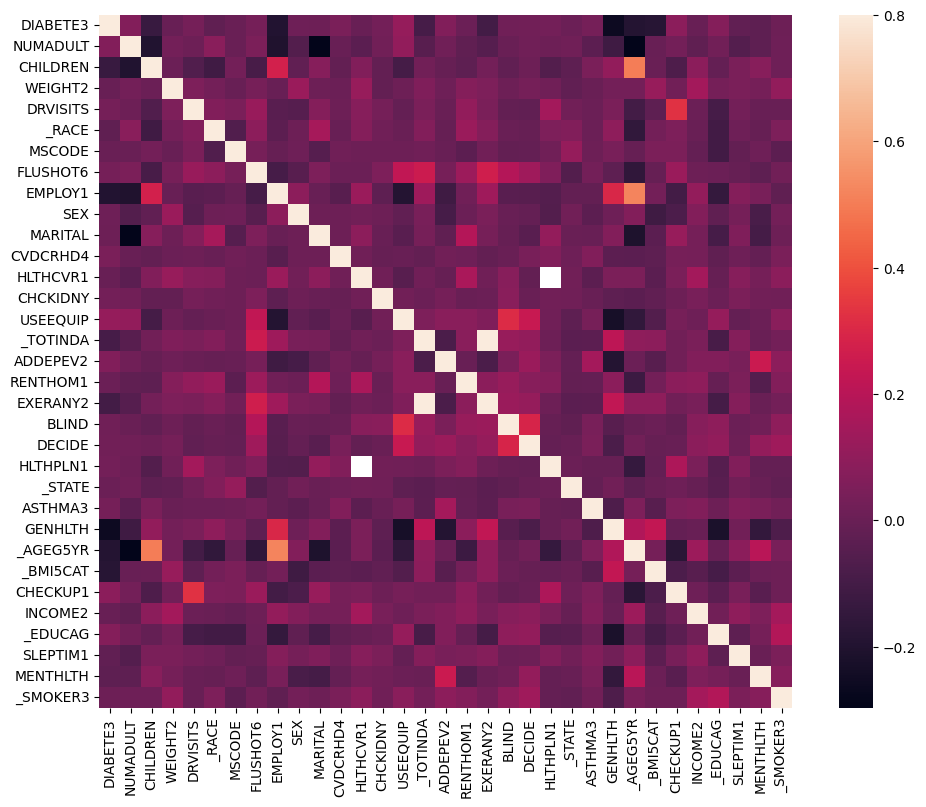

In [10]:
tmp_df = tmp_df.drop("PERSONID", axis=1)

#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
# correlation values
tmp_df.corr()['DIABETE3'].sort_values()

GENHLTH    -0.262288
EMPLOY1    -0.195581
_AGEG5YR   -0.192449
_BMI5CAT   -0.184727
CHILDREN   -0.130667
EXERANY2   -0.100523
_TOTINDA   -0.094097
MENTHLTH   -0.029373
_RACE      -0.023065
SLEPTIM1   -0.022054
WEIGHT2    -0.002622
HLTHCVR1   -0.002589
INCOME2    -0.001692
MSCODE     -0.000652
RENTHOM1    0.004468
_STATE      0.006365
_SMOKER3    0.010017
MARITAL     0.010931
SEX         0.012880
BLIND       0.017328
DECIDE      0.023833
HLTHPLN1    0.025467
CHCKIDNY    0.027210
DRVISITS    0.032040
ASTHMA3     0.032461
FLUSHOT6    0.032521
CVDCRHD4    0.041618
ADDEPEV2    0.062212
NUMADULT    0.064014
_EDUCAG     0.069299
CHECKUP1    0.087236
USEEQUIP    0.113116
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

In [12]:
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

What we've done above is we've made a heatmap of correlations and then picked out those top few that correlate (or anti-correlate) most highly with `DIABETE3`.  There is clearly lots of correlation between many of the variables as well that we should remember to account for later.  

#### **Correlation Thought Experiment**

The more correlation exists between the variables in our model, the more variance will be present.  Let's see if trimming some correlated variables can help our heatmap become more readable.  

In [13]:
# some additional tools
import statistics as stat
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

For the type of analysis we are about to run, a `VIF` score from:

- 0 to 1 - indicates low correlation with other variables
- 1 to 5 - indicates a moderate correlation with other variables
- over 5 - indicates a large correlation with other variables

In [14]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+_TOTINDA+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


     variable        VIF
0   Intercept   0.000000
1    NUMADULT   1.279734
2    CHILDREN   1.581101
3     WEIGHT2   1.044668
4    DRVISITS   1.118614
5       _RACE   1.069824
6      MSCODE   1.049888
7    FLUSHOT6   1.082400
8     EMPLOY1   1.664452
9         SEX   1.078101
10    MARITAL   1.253867
11   CVDCRHD4   1.012168
12   HLTHCVR1   1.044873
13   CHCKIDNY   1.014935
14   USEEQUIP   1.247354
15   _TOTINDA  83.165754
16   ADDEPEV2   1.153168
17   RENTHOM1   1.072753
18   EXERANY2  83.698476
19      BLIND   1.059302
20     DECIDE   1.089915
21   HLTHPLN1   0.000000
22     _STATE   1.023191
23    ASTHMA3   1.045196
24    GENHLTH   1.482458
25   _AGEG5YR   2.356012
26   _BMI5CAT   1.142287
27   CHECKUP1   1.134571
28    INCOME2   1.061954
29    _EDUCAG   1.186324
30   SLEPTIM1   1.044270
31   MENTHLTH   1.169750
32   _SMOKER3   1.102611


The high correlation results we are seeing here with `'_TOTINDA'` and `'EXERANY2'` makes complete sense.  

**As stated in the provided data bible:**
- `'_TOTINDA'` - "Adults who reported doing physical activity or exercise during the past 30 days other than their regular job"
- `'EXERANY2'` - "During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"

Since `'EXERANY2'` has a more significant effect at `-0.100523` (versus `'_TOTINDA'` at `-0.094097`), we are going to drop the `'_TOTINDA'` variable and run the `VIF` again.

In [15]:
#find design matrix for regression model using 'Survived' as response variable
y, X = dmatrices('DIABETE3 ~ NUMADULT+CHILDREN+WEIGHT2+DRVISITS+_RACE+MSCODE+FLUSHOT6+EMPLOY1+SEX+MARITAL+CVDCRHD4+HLTHCVR1+CHCKIDNY+USEEQUIP+ADDEPEV2+RENTHOM1+EXERANY2+BLIND+DECIDE+HLTHPLN1+_STATE+ASTHMA3+GENHLTH+_AGEG5YR+_BMI5CAT+CHECKUP1+INCOME2+_EDUCAG+SLEPTIM1+MENTHLTH+_SMOKER3', data=tmp_df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable
print(vif_df.to_string())

     variable       VIF
0   Intercept  0.000000
1    NUMADULT  1.279430
2    CHILDREN  1.580749
3     WEIGHT2  1.044667
4    DRVISITS  1.110729
5       _RACE  1.069728
6      MSCODE  1.047773
7    FLUSHOT6  1.081271
8     EMPLOY1  1.663848
9         SEX  1.077975
10    MARITAL  1.251949
11   CVDCRHD4  1.011994
12   HLTHCVR1  1.044608
13   CHCKIDNY  1.014860
14   USEEQUIP  1.247265
15   ADDEPEV2  1.151312
16   RENTHOM1  1.072570
17   EXERANY2  1.147209
18      BLIND  1.058977
19     DECIDE  1.089607
20   HLTHPLN1  0.000000
21     _STATE  1.022780
22    ASTHMA3  1.043889
23    GENHLTH  1.480194
24   _AGEG5YR  2.356011
25   _BMI5CAT  1.139861
26   CHECKUP1  1.133619
27    INCOME2  1.059613
28    _EDUCAG  1.185114
29   SLEPTIM1  1.043470
30   MENTHLTH  1.169697
31   _SMOKER3  1.090207


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Since there is only moderate correlation left, this is as much pruning as we will do right now.  Let's take a quick look at the correlation matrix and our top most interesting variables.

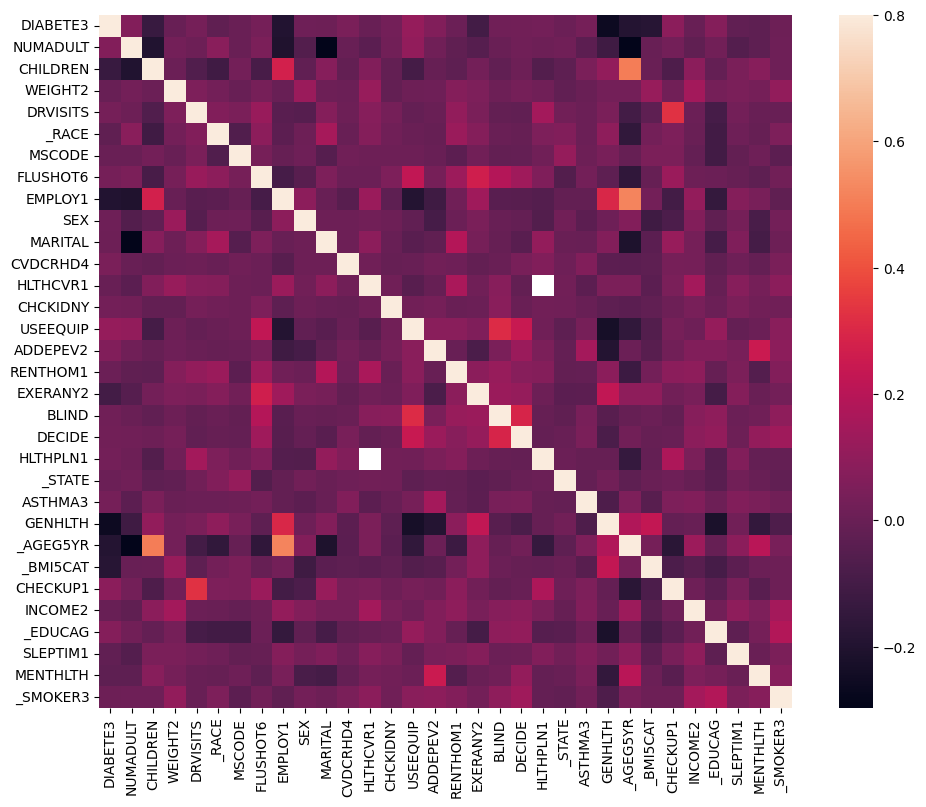

In [16]:
# drop _TOTINDA
tmp_df.drop("_TOTINDA", axis=1, inplace=True)

#correlation matrix
corrmat = tmp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
# top values to peek at according to correlation with DIABETE3
tmp_df.corr()['DIABETE3'].abs().sort_values().tail(6)

CHILDREN    0.130667
_BMI5CAT    0.184727
_AGEG5YR    0.192449
EMPLOY1     0.195581
GENHLTH     0.262288
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

#### **Quick Data Visualization**

In a series of plots below, we are going to compare the response variable `'DIABETE3'` to the five of the independent variables that it was most highly correlated with (`'CHILDREN'`, `'_BMI5CAT'`, `'_AGEG5YR'`, `'EMPLOY1'`, and `'GENHLTH'`).  

**Variable Details:**
- `'CHILDREN'` - "How many children less than 18 years of age live in your household?"
- `'_BMI5CAT'` - "Four-categories of Body Mass Index (BMI)"
- `'_AGEG5YR'` - "Fourteen-level age category"
- `'EMPLOY1'` - "Are you currently…?" [Question about employment]
- `'GENHLTH'` - "Would you say that in general your health is:" [Question about general health]

A simplified binomial look at the `'DIABETE3'` variable will help us visualize the above singled out variables.  Since there are far more entries for `'1.0'` and `'3.0'` (diabetes and no diabetes) than for `'2.0'` and `'4.0'` (pregnancy and pre-diabetes), let's drop responses `'2.0'` and `'4.0'`  from the temporary DataFrame we are working with and create a new variable `'DIABETE_SIMP'` that assigns `'0'` for `'3.0'` (patient does not have diabetes) and `'1'` for `'1.0'` (patient has diabetes).

In [18]:
# before dropping
print("Before dropping:", len(tmp_df))

# dropping 2.0 entries and 4.0 entries
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 2.0)]
tmp_df = tmp_df[~(tmp_df.DIABETE3 == 4.0)]

# reset the index
tmp_df.reset_index(inplace=True)
print("After dropping:", len(tmp_df))

Before dropping: 4993
After dropping: 4878


In [19]:
# creating DIABETE_SIMP
li1 = tmp_df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 1.0:
    li2.append(1)
  else:
    li2.append(0)

tmp_df["DIABETE_SIMP"] = li2

**Quick little scatterplot**

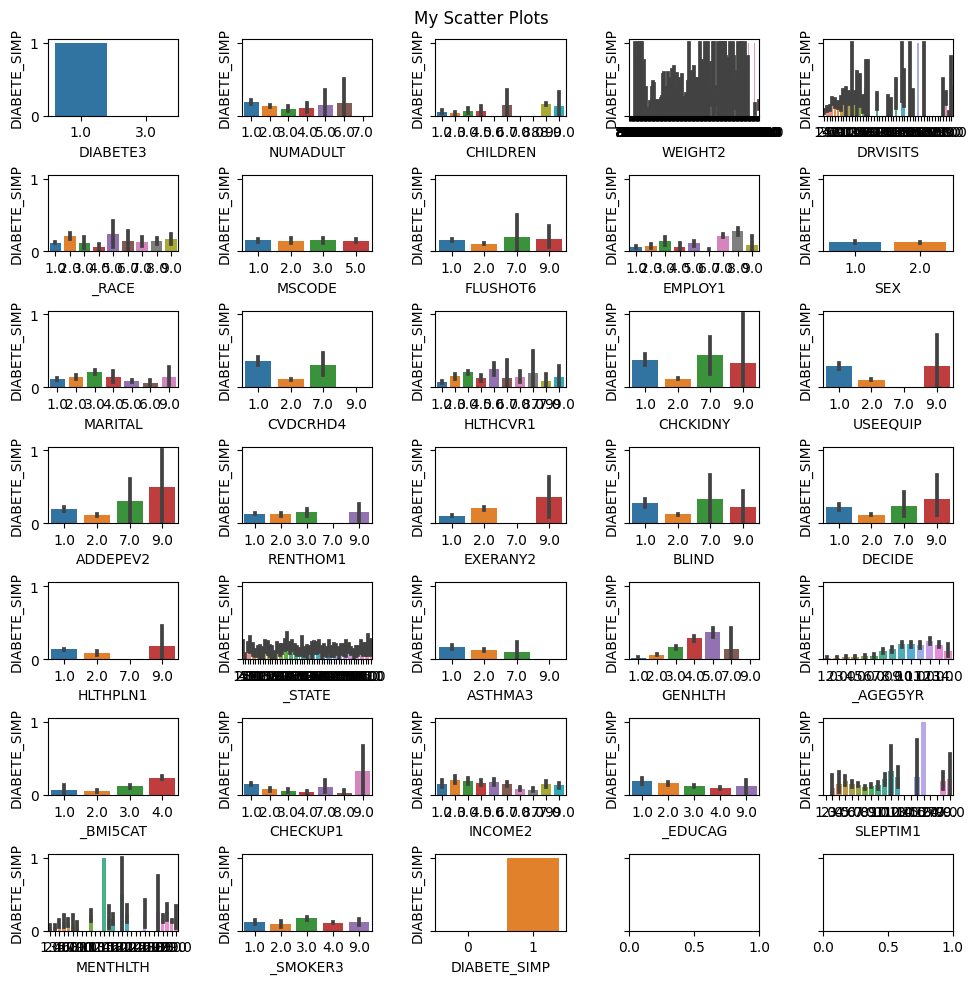

In [20]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(tmp_df.columns[1:]):
  if i <= 4:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

Wow!  Obviously we have some pretty useless plots amongst these that are worth taking a deeper look at on the basis of weird shape alone.  We'll come back around and run the above code again in the following sections to see how we have done in rescaling or dropping data.  

##### **Variable:** `'CHILDREN'`

"How many children less than 18 years of age live in your household?"

**Possible Responses:**
- 1 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 88 - "None"
- 99 - "Refused"

In [32]:
# CHILDREN counts
count = 0
for i in set(tmp_df["CHILDREN"]):
  if i >= 1.0:
    num = len(tmp_df[tmp_df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")
  else:
    count += 1
    continue
print(f"The number of people who did not answer for 'CHILDREN' is {count}")

The number of people who answered 1.0 for 'CHILDREN' is 511.
The number of people who answered 2.0 for 'CHILDREN' is 463.
The number of people who answered 3.0 for 'CHILDREN' is 186.
The number of people who answered 4.0 for 'CHILDREN' is 63.
The number of people who answered 5.0 for 'CHILDREN' is 20.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 2.
The number of people who answered 88.0 for 'CHILDREN' is 3582.
The number of people who answered 99.0 for 'CHILDREN' is 22.
The number of people who did not answer for 'CHILDREN' is 12


Let's transform `'88.0'` to `'0.0'` and create a new, even more temporary DataFrame for just this variable plot that exclude responses of `'99.0'`.

In [22]:
# Even more temporary dataframe
tmp_df_2 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_2))

# dropping 99.0 entries
tmp_df_2 = tmp_df[:].copy()
tmp_df_2 = tmp_df_2[~(tmp_df_2.CHILDREN == 99.0)]

# reset the index
tmp_df_2.reset_index(inplace=True)
print("After dropping:", len(tmp_df_2))

Before dropping: 4878
After dropping: 4856


In [23]:
# transform the CHILDREN variable
li1 = tmp_df_2["CHILDREN"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

tmp_df_2["CHILDREN_SIMP"] = li2

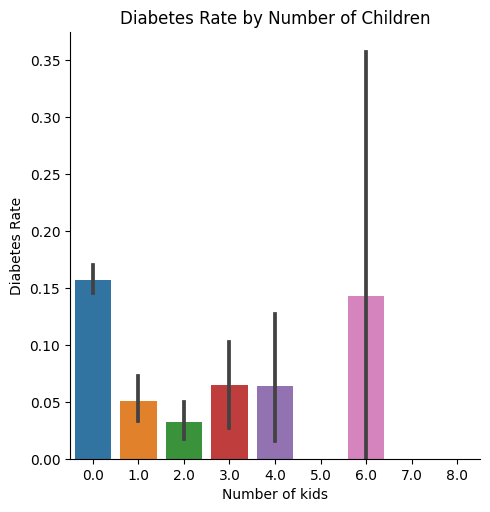

In [25]:
# CHILDREN_SIMP
sns.catplot(x="CHILDREN_SIMP", y="DIABETE_SIMP", data=tmp_df_2, kind="bar")
plt.title("Diabetes Rate by Number of Children")
plt.xlabel("Number of kids")
plt.ylabel("Diabetes Rate")
plt.show()

The plot above has increasing variance as the number of children increases.  Given this variance it is hard to see clear trends.  There may be a difference between the rates of folks with diabetes along the line of parenthood vs non-parenthood.  Let's check real quick.

In [26]:
# transform the CHILDREN_SIMP variable
li1 = tmp_df_2["CHILDREN_SIMP"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 0.0:
    li2.append(0)
  else:
    li2.append(1)

tmp_df_2["CHILDREN_SIMP_2"] = li2

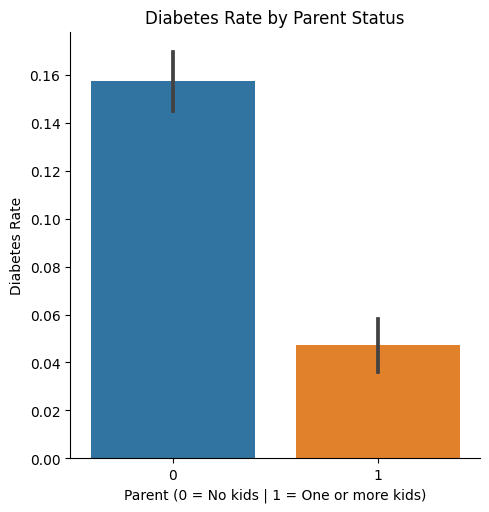

In [33]:
# CHILDREN_SIMP_2
sns.catplot(x="CHILDREN_SIMP_2", y="DIABETE_SIMP", data=tmp_df_2, kind="bar")
plt.title("Diabetes Rate by Parent Status")
plt.xlabel("Parent (0 = No kids | 1 = One or more kids)")
plt.ylabel("Diabetes Rate")
plt.show()

There does appear to be some difference between diabetes rates for people who have kids vs those without.  `'CHILDREN_SIMP_2'` might be more useful to our model than `'CHILDREN'` or `'CHILDREN_SIMP'`.

In [36]:
# Ranked from least to most absolute value of correlation with DIABETE_SIMP
tmp_df_2.corr()['DIABETE_SIMP'].abs().sort_values()

HLTHCVR1           0.001022
WEIGHT2            0.001061
RENTHOM1           0.002447
INCOME2            0.003437
MSCODE             0.005305
index              0.005744
level_0            0.005757
_STATE             0.007827
MARITAL            0.014271
SEX                0.018383
DECIDE             0.020184
_RACE              0.021138
_SMOKER3           0.021357
SLEPTIM1           0.021837
HLTHPLN1           0.022518
CHCKIDNY           0.023144
BLIND              0.026405
MENTHLTH           0.029520
DRVISITS           0.034128
ASTHMA3            0.037880
FLUSHOT6           0.039244
CVDCRHD4           0.049587
ADDEPEV2           0.064903
NUMADULT           0.070589
_EDUCAG            0.076736
CHECKUP1           0.095957
EXERANY2           0.111642
CHILDREN_SIMP      0.119035
USEEQUIP           0.128456
CHILDREN_SIMP_2    0.145073
CHILDREN           0.145204
_BMI5CAT           0.212990
EMPLOY1            0.216621
_AGEG5YR           0.217696
GENHLTH            0.290364
DIABETE_SIMP       1

In [37]:
# Quick housecleaning
tmp_df_2.drop("index", axis=1, inplace=True)
tmp_df_2.drop("level_0", axis=1, inplace=True)

HLTHCVR1           0.001022
WEIGHT2            0.001061
RENTHOM1           0.002447
INCOME2            0.003437
MSCODE             0.005305
_STATE             0.007827
MARITAL            0.014271
SEX                0.018383
DECIDE             0.020184
_RACE              0.021138
_SMOKER3           0.021357
SLEPTIM1           0.021837
HLTHPLN1           0.022518
CHCKIDNY           0.023144
BLIND              0.026405
MENTHLTH           0.029520
DRVISITS           0.034128
ASTHMA3            0.037880
FLUSHOT6           0.039244
CVDCRHD4           0.049587
ADDEPEV2           0.064903
NUMADULT           0.070589
_EDUCAG            0.076736
CHECKUP1           0.095957
EXERANY2           0.111642
CHILDREN_SIMP      0.119035
USEEQUIP           0.128456
CHILDREN_SIMP_2    0.145073
CHILDREN           0.145204
_BMI5CAT           0.212990
EMPLOY1            0.216621
_AGEG5YR           0.217696
GENHLTH            0.290364
DIABETE_SIMP       1.000000
DIABETE3           1.000000
Name: DIABETE_SIMP, 

According to our rankings, `CHILDREN_SIMP_2` is neck and neck with `CHILDREN`.  We think that using `CHILDREN_SIMP_2` is better than using `CHILDREN` because of how much less variability there is in the former.  

In [38]:
# Pass tmp_df_2 back into tmp_df
tmp_df = tmp_df_2[:].copy()

##### **Variable:** `'_BMI5CAT'`

"Four-categories of Body Mass Index (BMI)"

**Possible Responses:**
- 1 - "Underweight (Notes: `'_BMI5'` < 18.50 (`'_BMI5'` has 2 implied decimal places))"
- 2 - "Normal Weight (Notes: 18.50 <= `'_BMI5'` < 25.00)"
- 3 - "Overweight (Notes: 25.00 <= `'_BMI5'` < 30.00)"
- 4 - "Obese (Notes: 30.00 <= `'_BMI5'` <= 99.99)"

In [39]:
# _BMI5CAT counts
count = 0
for i in set(tmp_df["_BMI5CAT"]):
  if i >= 1.0:
    num = len(tmp_df[tmp_df["_BMI5CAT"] == i])
    print(f"The number of people who answered {i} for '_BMI5CAT' is {num}.")
  else:
    count += 1
    continue
print(f"The number of people who did not answer for '_BMI5CAT' is {count}")

The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1515.
The number of people who answered 3.0 for '_BMI5CAT' is 1611.
The number of people who answered 4.0 for '_BMI5CAT' is 1343.
The number of people who did not answer for '_BMI5CAT' is 303


Let's create another super temporary dataframe and drop the missing responses from it.  We will probably choose to fill the missing values later when setting up for modeling, but we have enough data to look for trends without it.

In [40]:
# temporary df
tmp_df_3 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_3))

# dropping
tmp_df_3 = tmp_df_3[(tmp_df_3._BMI5CAT >= 1.0)]

# reset the index
tmp_df_3.reset_index(inplace=True)
print("After dropping:", len(tmp_df_3))

Before dropping: 4856
After dropping: 4553


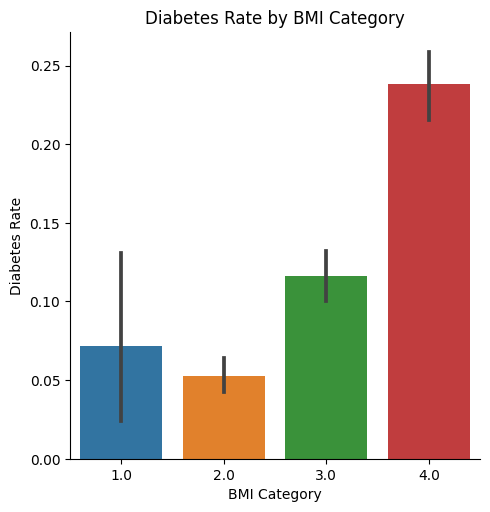

In [42]:
# _BMI5CAT
sns.catplot(x="_BMI5CAT", y="DIABETE_SIMP", data=tmp_df_3, kind="bar")
plt.title("Diabetes Rate by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Diabetes Rate")
plt.show()

This data is looking awful parabolic, though with the variability seen in the `1.0` category, that could be a mirage.  We may want to look into a transformation for `'_BMI5CAT'`.

In [43]:
# Pass tmp_df_3 back into tmp_df
tmp_df = tmp_df_3[:].copy()

##### **Variable:** `'_AGEG5YR'`

"Fourteen-level age category"

**Possible Responses:**
- 1 - Age 18 to 24 (Notes: 18 <= `'AGE'` <= 24)
- 2 - Age 25 to 29 (Notes: 25 <= `'AGE'` <= 29)
- 3 - Age 30 to 34 (Notes: 30 <= `'AGE'` <= 34)
- 4 - Age 35 to 39 (Notes: 35 <= `'AGE'` <= 39)
- 5 - Age 40 to 44 (Notes: 40 <= `'AGE'` <= 44)
- 6 - Age 45 to 49 (Notes: 45 <= `'AGE'` <= 49)
- 7 - Age 50 to 54 (Notes: 50 <= `'AGE'` <= 54)
- 8 - Age 55 to 59 (Notes: 55 <= `'AGE'` <= 59)
- 9 - Age 60 to 64 (Notes: 60 <= `'AGE'` <= 64)
- 10 - Age 65 to 69 (Notes: 65 <= `'AGE'` <= 69)
- 11 - Age 70 to 74 (Notes: 70 <= `'AGE'` <= 74)
- 12 - Age 75 to 79 (Notes: 75 <= `'AGE'` <= 79)
- 13 - Age 80 or older (Notes: 80 <= `'AGE'` <= 99)
- 14 - Don't know/Refused/Missing

In [48]:
# _AGEG5YR -
for i in set(tmp_df["_AGEG5YR"]):
    num = len(tmp_df[tmp_df["_AGEG5YR"] == i])
    print(f"The number of people who answered {i} for '_AGEG5YR' is {num}.")

The number of people who answered 1.0 for '_AGEG5YR' is 252.
The number of people who answered 2.0 for '_AGEG5YR' is 208.
The number of people who answered 3.0 for '_AGEG5YR' is 200.
The number of people who answered 4.0 for '_AGEG5YR' is 239.
The number of people who answered 5.0 for '_AGEG5YR' is 259.
The number of people who answered 6.0 for '_AGEG5YR' is 329.
The number of people who answered 7.0 for '_AGEG5YR' is 428.
The number of people who answered 8.0 for '_AGEG5YR' is 477.
The number of people who answered 9.0 for '_AGEG5YR' is 507.
The number of people who answered 10.0 for '_AGEG5YR' is 537.
The number of people who answered 11.0 for '_AGEG5YR' is 403.
The number of people who answered 12.0 for '_AGEG5YR' is 288.
The number of people who answered 13.0 for '_AGEG5YR' is 406.
The number of people who answered 14.0 for '_AGEG5YR' is 20.


Let's create a super temporary df and drop the people who refuse to answer.

In [49]:
# temporary df
tmp_df_4 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_4))

# dropping
tmp_df_4 = tmp_df_4[~(tmp_df_4._AGEG5YR > 13.0)]

# reset the index
tmp_df_4.reset_index(inplace=True)
print("After dropping:", len(tmp_df_4))

Before dropping: 4553
After dropping: 4533


Plot it!

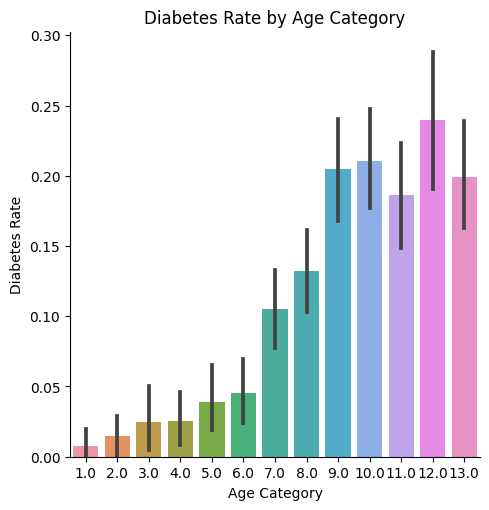

In [51]:
# _AGEG5YR
sns.catplot(x="_AGEG5YR", y="DIABETE_SIMP", data=tmp_df_4, kind="bar")
plt.title("Diabetes Rate by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Diabetes Rate")
plt.show()

Awesome!  The distribution of rates of diabetes is skewed towards people who fall in the older age categories.  Though there is some variance here, it might be worth taking a look at an exponential term for `'_AGEG5YR'` when we are preparing variables for our model.  

In [52]:
# Pass tmp_df_4 back into tmp_df
tmp_df = tmp_df_4[:].copy()

##### **Variable:** `'EMPLOY1'`



"Are you currently…?" [Question about employment]

**Possible Responses:**
- 1 - Employed for wages
- 2 - Self-employed
- 3 - Out of work for 1 year or more
- 4 - Out of work for less than 1 year
- 5 - A homemaker
- 6 - A student
- 7 - Retired
- 8 - Unable to work
- 9 - Refused

In [53]:
# EMPLOY1 counts
count = 0
for i in set(tmp_df["EMPLOY1"]):
  if i >= 1.0:
    num = len(tmp_df[tmp_df["EMPLOY1"] == i])
    print(f"The number of people who answered {i} for 'EMPLOY1' is {num}.")
  else:
    count += 1
    continue
print(f"The number of people who did not answer for 'EMPLOY1' is {count}")

The number of people who answered 1.0 for 'EMPLOY1' is 1834.
The number of people who answered 2.0 for 'EMPLOY1' is 382.
The number of people who answered 3.0 for 'EMPLOY1' is 113.
The number of people who answered 4.0 for 'EMPLOY1' is 93.
The number of people who answered 5.0 for 'EMPLOY1' is 268.
The number of people who answered 6.0 for 'EMPLOY1' is 94.
The number of people who answered 7.0 for 'EMPLOY1' is 1425.
The number of people who answered 8.0 for 'EMPLOY1' is 307.
The number of people who answered 9.0 for 'EMPLOY1' is 17.
The number of people who did not answer for 'EMPLOY1' is 0


Let's make the now familiar temporary dataframe to look at `'EMPLOY1'` where we drop `'nan'` values and `'9.0'` (people who refused to answer).

In [57]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)
tmp_df.drop("level_0", axis=1, inplace=True)

In [58]:
# temporary df
tmp_df_5 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_5))

# dropping
tmp_df_5 = tmp_df_5[~(tmp_df_5.EMPLOY1 >= 9.0)]
tmp_df_5 = tmp_df_5[~(tmp_df_5.EMPLOY1 < 1.0)]

# reset the index
tmp_df_5.reset_index(inplace=True)
print("After dropping:", len(tmp_df_5))

Before dropping: 4533
After dropping: 4516


Plot it!

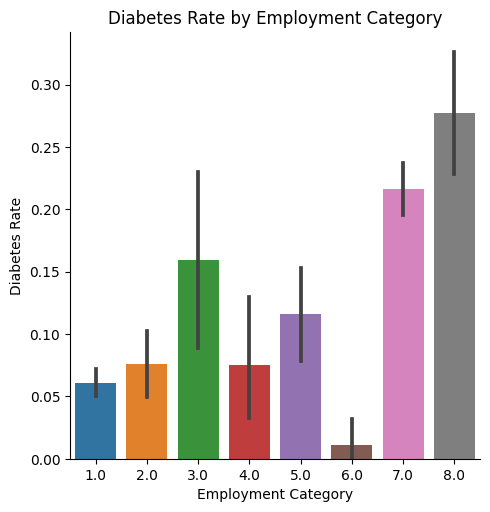

In [60]:
# EMPLOY1
sns.catplot(x="EMPLOY1", y="DIABETE_SIMP", data=tmp_df_5, kind="bar")
plt.title("Diabetes Rate by Employment Category")
plt.xlabel("Employment Category")
plt.ylabel("Diabetes Rate")
plt.show()

There's clearly an effect at play here.  Each category of employment is complete independent.  Category `'6.0'` makes sense because students are generally young.  Likewise, category `'8.0'` makes sense because disability is one of the primary reasons for a person to be unable to work and diabetes can be a disabling condition.  

In [61]:
# Pass tmp_df_5 back into tmp_df
tmp_df = tmp_df_5[:].copy()

##### **Variable:** `'GENHLTH'`

"Would you say that in general your health is:" [Question about general health]

**Possible Responses:**
- 1 - Excellent
- 2 - Very good
- 3 - Good
- 4 - Fair
- 5 - Poor
- 7 - Don't know/Not Sure
- 9 - Refused

In [62]:
# GENHLTH -
for i in set(tmp_df["GENHLTH"]):
    num = len(tmp_df[tmp_df["GENHLTH"] == i])
    print(f"The number of people who answered {i} for 'GENHLTH' is {num}.")

The number of people who answered 1.0 for 'GENHLTH' is 821.
The number of people who answered 2.0 for 'GENHLTH' is 1508.
The number of people who answered 3.0 for 'GENHLTH' is 1345.
The number of people who answered 4.0 for 'GENHLTH' is 614.
The number of people who answered 5.0 for 'GENHLTH' is 222.
The number of people who answered 7.0 for 'GENHLTH' is 6.


Creating a temporary DataFrame and dropping those people who don't know or refused to answer.

In [63]:
# temporary df
tmp_df_6 = tmp_df[:].copy()

# before dropping
print("Before dropping:", len(tmp_df_6))

# dropping
tmp_df_6 = tmp_df_6[~(tmp_df_6.GENHLTH >= 7.0)]

# reset the index
tmp_df_6.reset_index(inplace=True)
print("After dropping:", len(tmp_df_6))

Before dropping: 4516
After dropping: 4510


Plot it!

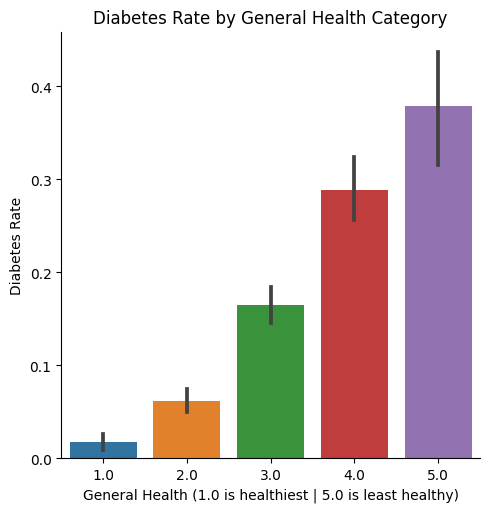

In [64]:
# GENHLTH
sns.catplot(x="GENHLTH", y="DIABETE_SIMP", data=tmp_df_6, kind="bar")
plt.title("Diabetes Rate by General Health Category")
plt.xlabel("General Health (1.0 is healthiest | 5.0 is least healthy)")
plt.ylabel("Diabetes Rate")
plt.show()

This shows a clear and linear increase in the risk of diabetes as one moves up `'GENHLTH'` categories (get's unhealthier).  This is the stuff we like to see when trying to determine which variables are most highly associated with developing diabetes.

In [65]:
# Pass tmp_df_6 back into tmp_df
tmp_df = tmp_df_6[:].copy()

In [67]:
# Quick housecleaning
tmp_df.drop("index", axis=1, inplace=True)
tmp_df.drop("level_0", axis=1, inplace=True)

#### **Let's take a quick check-in with our plots**

In [69]:
tmp_df.columns

Index(['DIABETE3', 'NUMADULT', 'CHILDREN', 'WEIGHT2', 'DRVISITS', '_RACE',
       'MSCODE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL', 'CVDCRHD4',
       'HLTHCVR1', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       'MENTHLTH', '_SMOKER3', 'DIABETE_SIMP', 'CHILDREN_SIMP',
       'CHILDREN_SIMP_2'],
      dtype='object')

In [70]:
tmp_df.drop("CHILDREN", axis=1, inplace=True)
tmp_df.drop("CHILDREN_SIMP", axis=1, inplace=True)

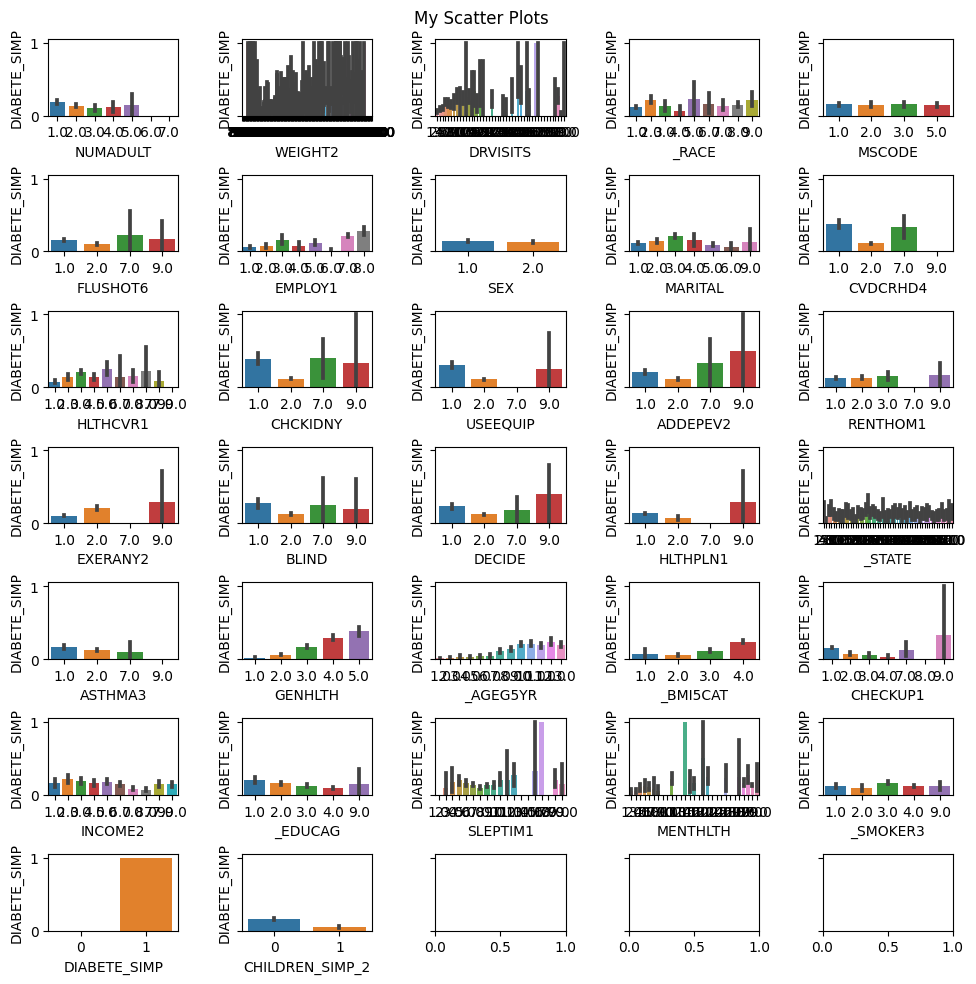

In [71]:
### PLOT BUILD
fig, ax = plt.subplots(7, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(tmp_df.columns[1:]):
  if i <= 4:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[4,i-20])
  elif i > 24 and i <=29:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[5,i-25])
  else:
    sns.barplot(x=tmp_df[col], y=tmp_df["DIABETE_SIMP"], ax=ax[6,i-30])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

Some marginal improvement across the variables we have looked at so far.  Let's keep it going!

Let's save our `tmp_df` to a `.csv` file, we've done some good pruning already.  

In [72]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
tmp_df.to_csv("drive/My Drive/Diabetes Risk Factors/diabetes_data_post_visualization.csv", index=False)

In [ ]:
### Pick it up here next time

### Dealing With Missing Data:

In the following code we will look at our variables and decide which are worth filling, which we should drop, and justify how we are doing so.  Let's start by recalling our complete dataframe and adding up our missing values.

In [ ]:
# dataframe
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/complete_diabetes_data.csv")

# sum missing data
df.isna().sum()

PERSONID       0
DIABETE3       0
NUMADULT    1760
CHILDREN      12
WEIGHT2       50
DRVISITS    1433
_RACE          3
MSCODE      1813
FLUSHOT6     238
EMPLOY1       19
SEX            0
MARITAL       10
CVDCRHD4       0
HLTHCVR1    1682
CHCKIDNY       0
USEEQUIP     163
_TOTINDA       0
ADDEPEV2       0
RENTHOM1     102
EXERANY2       0
BLIND        170
DECIDE       171
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     319
CHECKUP1       0
INCOME2       38
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

As we know from earlier poking around, we can drop the `'_TOTINDA'` variable, the `'EXERANY2'` variable captures almost the exact same data and has a higher correlation with our response variable, `'DIABETE3'`.  We also know to drop the seven entries for the two responses ('don't know' and 'refuse to answer') in `'DIABETE3'` because they will give our model nothing to work with.  Let's do this below.

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop _TOTINDA
df = df.drop("_TOTINDA", axis=1)

# dropping 7.0 and 9.0 entries
df = df[~(df.DIABETE3 == 7.0) & ~(df.DIABETE3 == 9.0)]

# before dropping
print("After dropping:", len(df))

Before dropping: 5000
After dropping: 4993


#### **Variable:** `'INCOME2'`

**Categorical variable**

"Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")"

**Variable Responses (in dollars):**
* 1 - Less than 10,000

* 2 - Less than 15,000 (10,000 to less than 15,000)

* 3 - Less than 20,000 (15,000 to less than 20,000)

* 4 - Less than 25,000 (20,000 to less than 25,000)

* 5 - Less than 35,000 (25,000 to less than 35,000)

* 6 - Less than 50,000 (35,000 to less than 50,000)

* 7 - Less than 75,000 (50,000 to less than 75,000)

* 8 - More than 75,000

* 77 - Don't know/Not sure

* 99 - Refused

In [ ]:
# INCOME2 counts
for i in set(df["INCOME2"]):
  if i >= 1.0:
    num = len(df[df["INCOME2"] == i])
    print(f"The number of people who answered {i} for 'INCOME2' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'INCOME2' is 211.
The number of people who answered 2.0 for 'INCOME2' is 265.
The number of people who answered 3.0 for 'INCOME2' is 331.
The number of people who answered 4.0 for 'INCOME2' is 392.
The number of people who answered 5.0 for 'INCOME2' is 472.
The number of people who answered 6.0 for 'INCOME2' is 654.
The number of people who answered 7.0 for 'INCOME2' is 645.
The number of people who answered 8.0 for 'INCOME2' is 1264.
The number of people who answered 77.0 for 'INCOME2' is 313.
The number of people who answered 99.0 for 'INCOME2' is 408.


**Fill Rationale**

There are only 38 missing values for `'INCOME2'`.  There is greater than a 5-to-1 ratio of income info given vs info unknown/withheld, so we will look to fill our missing values from the answer set `['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']`.  

Since there is a skew in the distribution of these values, we will use the median value to fill.  

In [ ]:
tot = 0

# INCOME2 sum
for i in set(df["INCOME2"]):
  num = 0
  if i >= 1.0 and i <= 8.0:
    num = len(df[df["INCOME2"] == i])
    tot += num
  else:
    continue

print(f"The total number of respondents in the zone we are looking at is: {tot}")

# find median
tot2 = tot/2
print(f"The median number is {tot2}")

sim = [8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

for i in range(len(sim)):
  if tot2 > 0.0:
    sim2 = 0
    print(f"i is currently {sim[i]}")
    sim2 += (df["INCOME2"] == sim[i]).sum()
    print(f"There are {sim2} entries in {sim[i]}")
    tot2 -= sim2
    print(f"Current total after removing {sim[i]} is {tot2}")
  else:
    print(f"The median value in the set of responses was a {sim[i-1]}")
    break

The total number of respondents in the zone we are looking at is: 4234
The median number is 2117.0
i is currently 8.0
There are 1264 entries in 8.0
Current total after removing 8.0 is 853.0
i is currently 7.0
There are 645 entries in 7.0
Current total after removing 7.0 is 208.0
i is currently 6.0
There are 654 entries in 6.0
Current total after removing 6.0 is -446.0
The median value in the set of responses was a 6.0


In [ ]:
# Fill the missing values in "Embarked" column
df["INCOME2"].fillna(6.0, inplace=True)

# sum missing data
df.isna().sum()

PERSONID       0
DIABETE3       0
NUMADULT    1757
CHILDREN      12
WEIGHT2       50
DRVISITS    1432
_RACE          3
MSCODE      1810
FLUSHOT6     238
EMPLOY1       19
SEX            0
MARITAL       10
CVDCRHD4       0
HLTHCVR1    1680
CHCKIDNY       0
USEEQUIP     163
ADDEPEV2       0
RENTHOM1     102
EXERANY2       0
BLIND        170
DECIDE       171
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     317
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'_RACE'`

**Categorical variable**

"Race/ethnicity categories"

**Variable Responses:**

- 1 - White only, non-Hispanic

- 2 - Black only, non-Hispanic

- 3 - American Indian or Alaskan Native only, Non-Hispanic

- 4 - Asian only, non-Hispanic

- 5 - Native Hawaiian or other Pacific Islander only, Non-Hispanic

- 6 - Other race only, non-Hispanic

- 7 - Multiracial, non-Hispanic

- 8 - Hispanic

- 9 - Don't know/Not sure/Refused


In [ ]:
# _RACE counts
for i in set(df["_RACE"]):
  if i >= 1.0:
    num = len(df[df["_RACE"] == i])
    print(f"The number of people who answered {i} for '_RACE' is {num}.")
  else:
    continue

The number of people who answered 1.0 for '_RACE' is 3854.
The number of people who answered 2.0 for '_RACE' is 361.
The number of people who answered 3.0 for '_RACE' is 85.
The number of people who answered 4.0 for '_RACE' is 86.
The number of people who answered 5.0 for '_RACE' is 17.
The number of people who answered 6.0 for '_RACE' is 32.
The number of people who answered 7.0 for '_RACE' is 103.
The number of people who answered 8.0 for '_RACE' is 359.
The number of people who answered 9.0 for '_RACE' is 93.


**Drop Rationale**

Since we are only missing three entries for `'_RACE'`, we think it better to drop the missing values instead of trying to guess.  

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in _RACE column
df = df[(df._RACE > 0)]

# after dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4993
After dropping: 4990


PERSONID       0
DIABETE3       0
NUMADULT    1754
CHILDREN      11
WEIGHT2       49
DRVISITS    1432
_RACE          0
MSCODE      1807
FLUSHOT6     237
EMPLOY1       18
SEX            0
MARITAL        9
CVDCRHD4       0
HLTHCVR1    1679
CHCKIDNY       0
USEEQUIP     162
ADDEPEV2       0
RENTHOM1     101
EXERANY2       0
BLIND        169
DECIDE       170
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     316
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'MARITAL'`

**Categorical variable**

"Are you: (marital status)"

**Variable Responses:**

- 1 - Married
- 2 - Divorced
- 3 - Widowed
- 4 - Separated
- 5 - Never married
- 6 - A member of an unmarried couple
- 9 - Refused

In [ ]:
# MARITAL counts
for i in set(df["MARITAL"]):
  if i >= 1.0:
    num = len(df[df["MARITAL"] == i])
    print(f"The number of people who answered {i} for 'MARITAL' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'MARITAL' is 2674.
The number of people who answered 2.0 for 'MARITAL' is 635.
The number of people who answered 3.0 for 'MARITAL' is 690.
The number of people who answered 4.0 for 'MARITAL' is 89.
The number of people who answered 5.0 for 'MARITAL' is 728.
The number of people who answered 6.0 for 'MARITAL' is 136.
The number of people who answered 9.0 for 'MARITAL' is 29.


**Drop Rationale**

Since we are only missing nine entries for `'MARITAL'`, we again think it better to drop the missing values instead of trying to guess.  

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in MARITAL column
df = df[(df.MARITAL > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4990
After dropping: 4981


PERSONID       0
DIABETE3       0
NUMADULT    1751
CHILDREN       2
WEIGHT2       40
DRVISITS    1430
_RACE          0
MSCODE      1804
FLUSHOT6     228
EMPLOY1        9
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1675
CHCKIDNY       0
USEEQUIP     153
ADDEPEV2       0
RENTHOM1      92
EXERANY2       0
BLIND        160
DECIDE       161
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     307
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'CHILDREN'`

**Numeric variable**

"How many children less than 18 years of age live in your household?"

**Possible Responses:**
- 1 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 88 - "None"
- 99 - "Refused"

In [ ]:
# CHILDREN counts
for i in set(df["CHILDREN"]):
  if i >= 1.0:
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'CHILDREN' is 527.
The number of people who answered 2.0 for 'CHILDREN' is 476.
The number of people who answered 3.0 for 'CHILDREN' is 186.
The number of people who answered 4.0 for 'CHILDREN' is 64.
The number of people who answered 99.0 for 'CHILDREN' is 22.
The number of people who answered 5.0 for 'CHILDREN' is 21.
The number of people who answered 6.0 for 'CHILDREN' is 15.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 2.
The number of people who answered 88.0 for 'CHILDREN' is 3663.


**Drop Rationale**

Since we are only missing 2 entries for `'CHILDREN'`, we again think it better to drop the missing values instead of trying to guess.  

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in CHILDREN column
df = df[(df.CHILDREN > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4981
After dropping: 4979



PERSONID       0
DIABETE3       0
NUMADULT    1751
CHILDREN       0
WEIGHT2       39
DRVISITS    1428
_RACE          0
MSCODE      1804
FLUSHOT6     227
EMPLOY1        8
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1673
CHCKIDNY       0
USEEQUIP     152
ADDEPEV2       0
RENTHOM1      91
EXERANY2       0
BLIND        159
DECIDE       160
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     305
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'EMPLOY1'`

**Categorical variable**

"Are you currently…?" [Question about employment]

**Possible Responses:**
- 1 - Employed for wages
- 2 - Self-employed
- 3 - Out of work for 1 year or more
- 4 - Out of work for less than 1 year
- 5 - A homemaker
- 6 - A student
- 7 - Retired
- 8 - Unable to work
- 9 - Refused

In [ ]:
# EMPLOY1 counts
for i in set(df["EMPLOY1"]):
  if i >= 1.0:
    num = len(df[df["EMPLOY1"] == i])
    print(f"The number of people who answered {i} for 'EMPLOY1' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'EMPLOY1' is 2013.
The number of people who answered 2.0 for 'EMPLOY1' is 414.
The number of people who answered 3.0 for 'EMPLOY1' is 128.
The number of people who answered 4.0 for 'EMPLOY1' is 103.
The number of people who answered 5.0 for 'EMPLOY1' is 306.
The number of people who answered 6.0 for 'EMPLOY1' is 99.
The number of people who answered 7.0 for 'EMPLOY1' is 1542.
The number of people who answered 8.0 for 'EMPLOY1' is 343.
The number of people who answered 9.0 for 'EMPLOY1' is 23.


**Drop Rationale**

Since we are only missing 8 entries for `'EMPLOY1'`, we again think it better to drop the missing values instead of trying to guess.  

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in EMPLOY1 column
df = df[(df.EMPLOY1 > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4971
After dropping: 4971



PERSONID       0
DIABETE3       0
NUMADULT    1747
CHILDREN       0
WEIGHT2       31
DRVISITS    1427
_RACE          0
MSCODE      1800
FLUSHOT6     219
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1671
CHCKIDNY       0
USEEQUIP     144
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND        151
DECIDE       152
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     297
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'WEIGHT2'`

**Numeric variable**

"About how much do you weigh without shoes? (If respondent answers in metrics put a 9 in the first column)[Round fractions up.]"

**Possible Responses:**
- 50 - 0999 - Weight (pounds)

- 7777 - Don't know/Not sure

- 9000 - 9998 - Weight (kilograms)
Notes: The initial '9' indicates this was a metric value.

- 9999 - Refused

In [ ]:
# WEIGHT2 counts
for i in set(df["WEIGHT2"]):
  if i >= 1.0:
    num = len(df[df["WEIGHT2"] == i])
    print(f"The number of people who answered {i} for 'WEIGHT2' is {num}.")
  else:
    continue

The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 219.0 for 'WEIGHT2' is 4.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 88.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 62.
The number of people who answered 98.0 for 'WEIGHT2' is 2.
The number of people who answered 99.0 for 'WEIGHT2

`'WEIGHT2'` is a bit of a mess, we're going to have to rescale it in the variable prep section.  But for now, we're not going to drop the unknown weight values as once `'WEIGHT2'` is rescaled we'll be able to fill the unknown values with the median.  

#### **Variable:** `'RENTHOM1'`

**Categorical variable**

"Do you own or rent your home? (Home is defined as the place where you live most of the time/the majority of the year.)"

**Possible Responses:**
- 1 - Own
- 2 - Rent
- 3 - Other arrangement
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# RENTHOM1 counts
for i in set(df["RENTHOM1"]):
  if i >= 1.0:
    num = len(df[df["RENTHOM1"] == i])
    print(f"The number of people who answered {i} for 'RENTHOM1' is {num}.")
  else:
    continue

**Fill Rationale**

We are going to fill the missing entries of `'RENTHOM1'` with the median value for `'RENTHOM1` of other entries that are in the same `'INCOME2'` bracket.  The idea here is that renting vs homeownership often is tied to personal wealth, so we will fill our missing data with that relationship in mind.  

In [ ]:
# Filling code
df['RENTHOM1'] = df['RENTHOM1'].fillna(df.groupby('INCOME2')['RENTHOM1'].transform('median'))

# sum missing data
df.isna().sum()

PERSONID       0
DIABETE3       0
NUMADULT    1747
CHILDREN       0
WEIGHT2       31
DRVISITS    1427
_RACE          0
MSCODE      1800
FLUSHOT6     219
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1671
CHCKIDNY       0
USEEQUIP     144
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND        151
DECIDE       152
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     297
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'BLIND'`

**Categorical variable**

"Are you blind or do you have serious difficulty seeing, even when wearing glasses?"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# BLIND counts
for i in set(df["BLIND"]):
  if i >= 1.0:
    num = len(df[df["BLIND"] == i])
    print(f"The number of people who answered {i} for 'BLIND' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'BLIND' is 247.
The number of people who answered 2.0 for 'BLIND' is 4556.
The number of people who answered 7.0 for 'BLIND' is 9.
The number of people who answered 9.0 for 'BLIND' is 8.


**Drop Rationale**

Since we are only missing 151 entries for `'BLIND'` and we still have a DataFrame with 4900+ rows, we again think it better to drop the missing values instead of trying to guess.  We were slightly torn about this, but there didn't seem to be a reliable enough marker to justify marking some of these yes, and some no.  With more time to work on this, we might have tried marking those without a diabetes diagnosis as not blind.

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in BLIND column
df = df[(df.BLIND > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4971
After dropping: 4820



PERSONID       0
DIABETE3       0
NUMADULT    1684
CHILDREN       0
WEIGHT2        0
DRVISITS    1384
_RACE          0
MSCODE      1737
FLUSHOT6      68
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1614
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         1
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     241
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

Conveniently, dropping all the missing entries for `'BLIND'` also eliminated the rows for all the missing entries of `'USEEQUIP'` and rows of nearly all the missing entries of `'DECIDE'`.

#### **Variable:** `'DECIDE'`

**Categorical variable**

"Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# DECIDE counts
for i in set(df["DECIDE"]):
  if i >= 1.0:
    num = len(df[df["DECIDE"] == i])
    print(f"The number of people who answered {i} for 'DECIDE' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'DECIDE' is 466.
The number of people who answered 2.0 for 'DECIDE' is 4322.
The number of people who answered 7.0 for 'DECIDE' is 23.
The number of people who answered 9.0 for 'DECIDE' is 8.


**Drop Rationale**

Since we are only missing one entry for `'DECIDE'` we are going to drop the row containing it.

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in DECIDE column
df = df[(df.DECIDE > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4820
After dropping: 4819



PERSONID       0
DIABETE3       0
NUMADULT    1684
CHILDREN       0
WEIGHT2        0
DRVISITS    1384
_RACE          0
MSCODE      1737
FLUSHOT6      67
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1614
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         0
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     240
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'FLUSHOT6'`

**Categorical variable**

"During the past 12 months, have you had either a flu shot or a flu vaccine that was sprayed in your nose? (A new flu shot came out in 2011 that injects vaccine into the skin with a very small needle. It is called Fluzone Intradermal vaccine. This is also considered a flu shot.)"

**Possible responses:**
- 1 - Yes
- 2 - No
- 7 - Don't know/Not Sure
- 9 - Refused

In [ ]:
# FLUSHOT6 counts
for i in set(df["FLUSHOT6"]):
  if i >= 1.0:
    num = len(df[df["FLUSHOT6"] == i])
    print(f"The number of people who answered {i} for 'FLUSHOT6' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'FLUSHOT6' is 2226.
The number of people who answered 2.0 for 'FLUSHOT6' is 2499.
The number of people who answered 7.0 for 'FLUSHOT6' is 11.
The number of people who answered 9.0 for 'FLUSHOT6' is 16.


**Drop Rationale**

Since we are only missing 67 entries for `'FLUSHOT6'` and the split is very even, we are going to drop rows containing said missing entries.

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in FLUSHOT6 column
df = df[(df.FLUSHOT6 > 0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4819
After dropping: 4752



PERSONID       0
DIABETE3       0
NUMADULT    1657
CHILDREN       0
WEIGHT2        0
DRVISITS    1369
_RACE          0
MSCODE      1710
FLUSHOT6       0
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1596
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         0
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT     231
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'_BMI5CAT'`

**Categorical variable**

"Four-categories of Body Mass Index (BMI)"

**Possible responses:**
- 1 - "Underweight (Notes: `'_BMI5'` < 18.50)"
- 2 - "Normal Weight (Notes: 18.50 <= `'_BMI5'` < 25.00)"
- 3 - "Overweight (Notes: 25.00 <= `'_BMI5'` < 30.00)"
- 4 - "Obese (Notes: 30.00 <= `'_BMI5'` <= 99.99)"

In [ ]:
# _BMI5CAT counts
for i in set(df["_BMI5CAT"]):
  if i >= 1.0:
    num = len(df[df["_BMI5CAT"] == i])
    print(f"The number of people who answered {i} for '_BMI5CAT' is {num}.")
  else:
    continue

The number of people who answered 1.0 for '_BMI5CAT' is 84.
The number of people who answered 2.0 for '_BMI5CAT' is 1471.
The number of people who answered 3.0 for '_BMI5CAT' is 1808.
The number of people who answered 4.0 for '_BMI5CAT' is 1334.


**Fill Rationale**

We are going to fill the missing entries of `'_BMI5CAT'` with the median value for `'_BMI5CAT` of other entries that are in the same `'EXERANY2'` bracket.  The idea here is that a BMI usually has some decent correlation with activity level.  

In [ ]:
# Filling code
df['_BMI5CAT'] = df['_BMI5CAT'].fillna(df.groupby('EXERANY2')['_BMI5CAT'].transform('median'))

# sum missing data
df.isna().sum()

PERSONID       0
DIABETE3       0
NUMADULT    1657
CHILDREN       0
WEIGHT2        0
DRVISITS    1369
_RACE          0
MSCODE      1710
FLUSHOT6       0
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1596
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         0
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT       0
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
MENTHLTH       0
_SMOKER3       0
dtype: int64

#### **Variable:** `'DRVISITS'`

**Numeric variable**

"How many times have you been to a doctor, nurse, or other health professional in the past 12 months?"

**Possible responses:**
- 1 - 76 - Number of times
- 88 - None
- 77 - Dont know/Not Sure

In [ ]:
# DRVISITS counts
for i in set(df["DRVISITS"]):
  if i >= 1.0:
    num = len(df[df["DRVISITS"] == i])
    print(f"The number of people who answered {i} for 'DRVISITS' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'DRVISITS' is 533.
The number of people who answered 2.0 for 'DRVISITS' is 566.
The number of people who answered 3.0 for 'DRVISITS' is 416.
The number of people who answered 4.0 for 'DRVISITS' is 382.
The number of people who answered 5.0 for 'DRVISITS' is 193.
The number of people who answered 6.0 for 'DRVISITS' is 241.
The number of people who answered 7.0 for 'DRVISITS' is 60.
The number of people who answered 8.0 for 'DRVISITS' is 82.
The number of people who answered 9.0 for 'DRVISITS' is 18.
The number of people who answered 10.0 for 'DRVISITS' is 109.
The number of people who answered 11.0 for 'DRVISITS' is 3.
The number of people who answered 12.0 for 'DRVISITS' is 116.
The number of people who answered 13.0 for 'DRVISITS' is 6.
The number of people who answered 14.0 for 'DRVISITS' is 15.
The number of people who answered 15.0 for 'DRVISITS' is 44.
The number of people who answered 16.0 for 'DRVISITS' is 7.
The number of people who ans

With so many missing entries (1369) it might not be the best idea to try to fill the missing data.  Let's take a quick look at the current significance of this variable before we decide.  

In [ ]:
# correlation values
df.corr()['DIABETE3'].sort_values()

GENHLTH    -0.265577
EMPLOY1    -0.195409
_AGEG5YR   -0.192142
_BMI5CAT   -0.180517
CHILDREN   -0.132449
EXERANY2   -0.088540
MENTHLTH   -0.031584
_RACE      -0.027696
SLEPTIM1   -0.017301
MSCODE      0.001479
WEIGHT2     0.002188
_SMOKER3    0.002457
_STATE      0.004273
PERSONID    0.006757
INCOME2     0.006873
MARITAL     0.010688
HLTHCVR1    0.010691
RENTHOM1    0.014747
SEX         0.017426
HLTHPLN1    0.022675
BLIND       0.025660
ASTHMA3     0.028947
DRVISITS    0.032837
CHCKIDNY    0.034055
DECIDE      0.037337
FLUSHOT6    0.038575
CVDCRHD4    0.040371
ADDEPEV2    0.063550
NUMADULT    0.066261
_EDUCAG     0.070386
CHECKUP1    0.089349
USEEQUIP    0.125620
DIABETE3    1.000000
Name: DIABETE3, dtype: float64

**Dump the column rationale**

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE3'` variable of just `0.032837`, there's not much potential to adding a bunch of extrapolated data to this one column.  

We will revisit the idea of dropping this column when we chose our model.  

#### **Variable:** `'HLTHCVR1'`

**Categorical variable**

"What is the primary source of your health care coverage? Is it…"

**Possible responses:**
- 1 - A plan purchased through an employer or union -
Notes: includes plans purchased through another person's employer
- 2 - A plan that you or another family member buys on your own
- 3 - Medicare
- 4 - Medicaid or other state program
- 5 - TRICARE (formerly CHAMPUS), VA, or Military
- 6 - Alaska Native, Indian Health Service, Tribal Health Services
- 7 - Some other source
- 8 - None (no coverage)
- 77 - Don't know/Not Sure
- 99 - Refused

In [ ]:
# HLTHCVR1 counts
for i in set(df["HLTHCVR1"]):
  if i >= 1.0:
    num = len(df[df["HLTHCVR1"] == i])
    print(f"The number of people who answered {i} for 'HLTHCVR1' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'HLTHCVR1' is 1451.
The number of people who answered 2.0 for 'HLTHCVR1' is 328.
The number of people who answered 3.0 for 'HLTHCVR1' is 925.
The number of people who answered 4.0 for 'HLTHCVR1' is 213.
The number of people who answered 5.0 for 'HLTHCVR1' is 90.
The number of people who answered 6.0 for 'HLTHCVR1' is 8.
The number of people who answered 7.0 for 'HLTHCVR1' is 79.
The number of people who answered 8.0 for 'HLTHCVR1' is 9.
The number of people who answered 77.0 for 'HLTHCVR1' is 40.
The number of people who answered 99.0 for 'HLTHCVR1' is 13.


**Dump the column rationale**

We are missing 1596 entries for `'HLTHCVR1'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE3'` variable of just `0.010691` (as seen in the above `'DRVISITS'` section), there's not much potential in adding a bunch of extrapolated data to this one column.  

Additionally in this case, `'HLTHPLN1'` is a very similar yes/no variable that probably captures at least some of the effect that `'HLTHCVR1'` captures.

We will revisit the idea of dropping this column when we chose our model.  

#### **Variable:** `'MSCODE'`

**Categorical variable**

"Metropolitan Status Code"

**Possible responses:**
- 1 - In the center city of an MSA
- 2 - Outside the center city of an MSA but inside the county containing the center city
- 3 - Inside a suburban county of the MSA
- 5 - Not in an MSA

In [ ]:
# MSCODE counts
for i in set(df["MSCODE"]):
  if i >= 1.0:
    num = len(df[df["MSCODE"] == i])
    print(f"The number of people who answered {i} for 'MSCODE' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'MSCODE' is 989.
The number of people who answered 2.0 for 'MSCODE' is 520.
The number of people who answered 3.0 for 'MSCODE' is 471.
The number of people who answered 5.0 for 'MSCODE' is 1062.


**Dump the column rationale**

We are missing 1710 entries for `'MSCODE'`.

Unless we are going to use a model that is robust against missing values, we should dump this column.  With a correlation to the `'DIABETE3'` variable of just `0.001479` (as seen in the `'DRVISITS'` section), there's not much potential in adding a bunch of extrapolated data to this one column.  

We will revisit the idea of dropping this column when we chose our model.

#### **Variable:** `'NUMADULT'`

**Numeric variable**

"Number of Adults in Household"

**Variable Responses:**

- 1 to 99 - Number of adults in the household

In [ ]:
# NUMADULT counts
for i in set(df["NUMADULT"]):
  if i >= 1.0:
    num = len(df[df["NUMADULT"] == i])
    print(f"The number of people who answered {i} for 'NUMADULT' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'NUMADULT' is 1201.
The number of people who answered 2.0 for 'NUMADULT' is 1648.
The number of people who answered 3.0 for 'NUMADULT' is 264.
The number of people who answered 4.0 for 'NUMADULT' is 94.
The number of people who answered 5.0 for 'NUMADULT' is 21.
The number of people who answered 7.0 for 'NUMADULT' is 2.
The number of people who answered 6.0 for 'NUMADULT' is 6.


**Dump the column rationale**

We are missing 1657 entries for `'NUMADULT'`.

Unless we are going to use a model that is robust against missing values, we should dump this column. With a correlation to the `'DIABETE3'` variable of just `0.066261` (as seen in the `'DRVISITS'` section), there's not much potential to adding a bunch of extrapolated data to this one column.

We will revisit the idea of dropping this column when we chose our model.


#### Saving a copy of our trimmed down DataFrame

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv", index=False)

### Rescaling/Adjusting Variables

In the interest of time and space, we are only going to mention those variables we intend to adjust and a brief description of why.

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4752 non-null   int64  
 1   DIABETE3  4752 non-null   float64
 2   NUMADULT  3095 non-null   float64
 3   CHILDREN  4752 non-null   float64
 4   WEIGHT2   4752 non-null   float64
 5   DRVISITS  3383 non-null   float64
 6   _RACE     4752 non-null   float64
 7   MSCODE    3042 non-null   float64
 8   FLUSHOT6  4752 non-null   float64
 9   EMPLOY1   4752 non-null   float64
 10  SEX       4752 non-null   float64
 11  MARITAL   4752 non-null   float64
 12  CVDCRHD4  4752 non-null   float64
 13  HLTHCVR1  3156 non-null   float64
 14  CHCKIDNY  4752 non-null   float64
 15  USEEQUIP  4752 non-null   float64
 16  ADDEPEV2  4752 non-null   float64
 17  RENTHOM1  4752 non-null   float64
 18  EXERANY2  4752 non-null   float64
 19  BLIND     4752 non-null   float64
 20  DECIDE    4752 non-null   floa

#### **Variable:** `'CHILDREN'`

**Numeric variable**

"How many children less than 18 years of age live in your household?"

**Possible responses:**
- 1 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 88 - "None"
- 99 - "Refused"

We are going to convert all `'88.0'` entries into `'0.0'` entries.

**New responses:**
- 0 to 87 - "Number of children (Notes: _ _ = Number of children)"
- 99 - "Refused"

In [ ]:
# CHILDREN counts
for i in set(df["CHILDREN"]):
  if i >= 0.0:
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'CHILDREN' is 505.
The number of people who answered 2.0 for 'CHILDREN' is 452.
The number of people who answered 3.0 for 'CHILDREN' is 177.
The number of people who answered 4.0 for 'CHILDREN' is 60.
The number of people who answered 99.0 for 'CHILDREN' is 18.
The number of people who answered 5.0 for 'CHILDREN' is 21.
The number of people who answered 6.0 for 'CHILDREN' is 15.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 1.
The number of people who answered 88.0 for 'CHILDREN' is 3500.


In [ ]:
# transform the CHILDREN variable
li1 = df["CHILDREN"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 80 and li1[i] < 90:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("CHILDREN", axis=1, inplace=True)
df["CHILDREN"] = li2

In [ ]:
# CHILDREN counts
for i in set(df["CHILDREN"]):
  if i >= 0.0:
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")
  else:
    continue

The number of people who answered 0.0 for 'CHILDREN' is 3500.
The number of people who answered 1.0 for 'CHILDREN' is 505.
The number of people who answered 2.0 for 'CHILDREN' is 452.
The number of people who answered 3.0 for 'CHILDREN' is 177.
The number of people who answered 4.0 for 'CHILDREN' is 60.
The number of people who answered 99.0 for 'CHILDREN' is 18.
The number of people who answered 5.0 for 'CHILDREN' is 21.
The number of people who answered 6.0 for 'CHILDREN' is 15.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 1.


Looks good!

#### **Variable:** `'WEIGHT2'`

**Numeric variable**

"About how much do you weigh without shoes? (If respondent answers in metrics put a 9 in the first column)[Round fractions up.]"

**Possible Responses:**
- 50 - 0999 - Weight (pounds)

- 7777 - Don't know/Not sure

- 9000 - 9998 - Weight (kilograms)
Notes: The initial '9' indicates this was a metric value.

- 9999 - Refused

In [ ]:
# WEIGHT2 counts
for i in set(df["WEIGHT2"]):
  if i >= 1.0:
    num = len(df[df["WEIGHT2"] == i])
    print(f"The number of people who answered {i} for 'WEIGHT2' is {num}.")
  else:
    continue

The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 88.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 53.
The number of people who answered 98.0 for 'WEIGHT2' is 1.
The number of people who answered 99.0 for 'WEIGHT2' is 3.
The number of people who answered 100.0 for 'WEIGHT2

The `'WEIGHT2'` variable is a mess, with some weights being in kilos, some in pounds, and a strong tendency to fall on a multiple of five.  We are going to turn it all into pounds, then put it into bins of size 10 until 300lbs, size 20 until 400, then size 50 until 500.  The rescaled variable will be laid out as so.  

**Possible Responses:**
- 1 - 70 <= Weight (lbs) < 80
- 2 - 80 <= Weight (lbs) < 90
- 3 - 90 <= Weight (lbs) < 100
- 4 - 100 <= Weight (lbs) < 110
- 5 - 110 <= Weight (lbs) < 120
- 6 - 120 <= Weight (lbs) < 130
- 7 - 130 <= Weight (lbs) < 140
- 8 - 140 <= Weight (lbs) < 150
- 9 - 150 <= Weight (lbs) < 160
- 10 - 160 <= Weight (lbs) < 170
- 11 - 170 <= Weight (lbs) < 180
- 12 - 180 <= Weight (lbs) < 190
- 13 - 190 <= Weight (lbs) < 200
- 14 - 200 <= Weight (lbs) < 210
- 15 - 210 <= Weight (lbs) < 220
- 16 - 220 <= Weight (lbs) < 230
- 17 - 230 <= Weight (lbs) < 240
- 18 - 240 <= Weight (lbs) < 250
- 19 - 250 <= Weight (lbs) < 260
- 20 - 260 <= Weight (lbs) < 270
- 21 - 270 <= Weight (lbs) < 280
- 22 - 280 <= Weight (lbs) < 290
- 23 - 290 <= Weight (lbs) < 300
- 24 - 300 <= Weight (lbs) < 320
- 25 - 330 <= Weight (lbs) < 340
- 26 - 340 <= Weight (lbs) < 360
- 27 - 360 <= Weight (lbs) < 380
- 28 - 380 <= Weight (lbs) < 400
- 29 - 400 <= Weight (lbs) < 450
- 30 - 450 <= Weight (lbs) < 500
- 31 - Weight (lbs) >= 500
- 50 - Don't know/Not sure
- 55 - Refused

**Kilos to Pounds**

In [ ]:
import math

# transform the WEIGHT2 variable
li1 = df["WEIGHT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] >= 9000 and li1[i] <= 9998:
    rounded = math.ceil(float(str(li1[i])[1:])*2.204623)
    li2.append(float(rounded))
  else:
    li2.append(li1[i])

df.drop("WEIGHT2", axis=1, inplace=True)
df["WEIGHT2"] = li2

In [ ]:
# WEIGHT2 counts
for i in set(df["WEIGHT2"]):
  if i >= 1.0:
    num = len(df[df["WEIGHT2"] == i])
    print(f"The number of people who answered {i} for 'WEIGHT2' is {num}.")
  else:
    continue

The number of people who answered 580.0 for 'WEIGHT2' is 1.
The number of people who answered 75.0 for 'WEIGHT2' is 1.
The number of people who answered 84.0 for 'WEIGHT2' is 1.
The number of people who answered 86.0 for 'WEIGHT2' is 1.
The number of people who answered 87.0 for 'WEIGHT2' is 1.
The number of people who answered 88.0 for 'WEIGHT2' is 1.
The number of people who answered 89.0 for 'WEIGHT2' is 1.
The number of people who answered 90.0 for 'WEIGHT2' is 2.
The number of people who answered 92.0 for 'WEIGHT2' is 2.
The number of people who answered 93.0 for 'WEIGHT2' is 3.
The number of people who answered 94.0 for 'WEIGHT2' is 1.
The number of people who answered 95.0 for 'WEIGHT2' is 1.
The number of people who answered 96.0 for 'WEIGHT2' is 3.
The number of people who answered 7777.0 for 'WEIGHT2' is 53.
The number of people who answered 98.0 for 'WEIGHT2' is 1.
The number of people who answered 99.0 for 'WEIGHT2' is 3.
The number of people who answered 100.0 for 'WEIGHT2

Success!

**Pounds to Bin Categories**

In [ ]:
# transform the WEIGHT2 variable
li1 = df["WEIGHT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] <= 1000:
    if li1[i] >= 70 and li1[i] < 80:
      li2.append(1)
    elif li1[i] >= 80 and li1[i] < 90:
      li2.append(2)
    elif li1[i] >= 90 and li1[i] < 100:
      li2.append(3)
    elif li1[i] >= 100 and li1[i] < 110:
      li2.append(4)
    elif li1[i] >= 110 and li1[i] < 120:
      li2.append(5)
    elif li1[i] >= 120 and li1[i] < 130:
      li2.append(6)
    elif li1[i] >= 130 and li1[i] < 140:
      li2.append(7)
    elif li1[i] >= 140 and li1[i] < 150:
      li2.append(8)
    elif li1[i] >= 150 and li1[i] < 160:
      li2.append(9)
    elif li1[i] >= 160 and li1[i] < 170:
      li2.append(10)
    elif li1[i] >= 170 and li1[i] < 180:
      li2.append(11)
    elif li1[i] >= 180 and li1[i] < 190:
      li2.append(12)
    elif li1[i] >= 190 and li1[i] < 200:
      li2.append(13)
    elif li1[i] >= 200 and li1[i] < 210:
      li2.append(14)
    elif li1[i] >= 210 and li1[i] < 220:
      li2.append(15)
    elif li1[i] >= 220 and li1[i] < 230:
      li2.append(16)
    elif li1[i] >= 230 and li1[i] < 240:
      li2.append(17)
    elif li1[i] >= 240 and li1[i] < 250:
      li2.append(18)
    elif li1[i] >= 250 and li1[i] < 260:
      li2.append(19)
    elif li1[i] >= 260 and li1[i] < 270:
      li2.append(20)
    elif li1[i] >= 270 and li1[i] < 280:
      li2.append(21)
    elif li1[i] >= 280 and li1[i] < 290:
      li2.append(22)
    elif li1[i] >= 290 and li1[i] < 300:
      li2.append(23)
    elif li1[i] >= 300 and li1[i] < 320:
      li2.append(24)
    elif li1[i] >= 320 and li1[i] < 340:
      li2.append(25)
    elif li1[i] >= 340 and li1[i] < 360:
      li2.append(26)
    elif li1[i] >= 360 and li1[i] < 380:
      li2.append(27)
    elif li1[i] >= 380 and li1[i] < 400:
      li2.append(28)
    elif li1[i] >= 400 and li1[i] < 450:
      li2.append(29)
    elif li1[i] >= 450 and li1[i] < 500:
      li2.append(30)
    elif li1[i] >= 500:
      li2.append(31)
  else:
    li2.append(li1[i])

df.drop("WEIGHT2", axis=1, inplace=True)
df["WEIGHT2"] = li2

In [ ]:
# WEIGHT2 counts
for i in set(df["WEIGHT2"]):
  if i >= 1.0:
    num = len(df[df["WEIGHT2"] == i])
    print(f"The number of people who answered {i} for 'WEIGHT2' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'WEIGHT2' is 1.
The number of people who answered 2.0 for 'WEIGHT2' is 5.
The number of people who answered 3.0 for 'WEIGHT2' is 16.
The number of people who answered 4.0 for 'WEIGHT2' is 74.
The number of people who answered 5.0 for 'WEIGHT2' is 139.
The number of people who answered 6.0 for 'WEIGHT2' is 278.
The number of people who answered 7.0 for 'WEIGHT2' is 388.
The number of people who answered 8.0 for 'WEIGHT2' is 359.
The number of people who answered 9.0 for 'WEIGHT2' is 406.
The number of people who answered 10.0 for 'WEIGHT2' is 476.
The number of people who answered 11.0 for 'WEIGHT2' is 415.
The number of people who answered 12.0 for 'WEIGHT2' is 376.
The number of people who answered 13.0 for 'WEIGHT2' is 354.
The number of people who answered 14.0 for 'WEIGHT2' is 333.
The number of people who answered 9999.0 for 'WEIGHT2' is 131.
The number of people who answered 16.0 for 'WEIGHT2' is 209.
The number of people who answered 17.

Nice!

**Don't Know/Refused**

In [ ]:
# transform the WEIGHT2 variable
li1 = df["WEIGHT2"]
li2 = []

for i in range(len(li1)):
  if li1[i] > 7000 and li1[i] < 9000:
    li2.append(50)
  elif li1[i] == 9999.0:
    li2.append(55)
  else:
    li2.append(li1[i])

df.drop("WEIGHT2", axis=1, inplace=True)
df["WEIGHT2"] = li2

**Final Counts to Double-Check**

In [ ]:
# WEIGHT2 counts
for i in set(df["WEIGHT2"]):
  if i >= 1.0:
    num = len(df[df["WEIGHT2"] == i])
    print(f"The number of people who answered {i} for 'WEIGHT2' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'WEIGHT2' is 1.
The number of people who answered 2.0 for 'WEIGHT2' is 5.
The number of people who answered 3.0 for 'WEIGHT2' is 16.
The number of people who answered 4.0 for 'WEIGHT2' is 74.
The number of people who answered 5.0 for 'WEIGHT2' is 139.
The number of people who answered 6.0 for 'WEIGHT2' is 278.
The number of people who answered 7.0 for 'WEIGHT2' is 388.
The number of people who answered 8.0 for 'WEIGHT2' is 359.
The number of people who answered 9.0 for 'WEIGHT2' is 406.
The number of people who answered 10.0 for 'WEIGHT2' is 476.
The number of people who answered 11.0 for 'WEIGHT2' is 415.
The number of people who answered 12.0 for 'WEIGHT2' is 376.
The number of people who answered 13.0 for 'WEIGHT2' is 354.
The number of people who answered 14.0 for 'WEIGHT2' is 333.
The number of people who answered 15.0 for 'WEIGHT2' is 197.
The number of people who answered 16.0 for 'WEIGHT2' is 209.
The number of people who answered 17.0 

Looks good!

#### **Variable:** `'MENTHLTH'`

**Numeric variable**

"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"

**Possible responses:**
- 1 to 30 - "Number of days"
- 77 - "Don't know/Not sure"
- 88 - "None"
- 99 - "Refused"

We are going to convert all `'88.0'` entries into `'0.0'` entries and drop those responses that give us no data.

**New responses:**
- 0 to 30 - "Number of days" (includes "None")


In [ ]:
# MENTHLTH counts
for i in set(df["MENTHLTH"]):
  if i >= 0.0:
    num = len(df[df["MENTHLTH"] == i])
    print(f"The number of people who answered {i} for 'MENTHLTH' is {num}.")
  else:
    continue

The number of people who answered 1.0 for 'MENTHLTH' is 145.
The number of people who answered 2.0 for 'MENTHLTH' is 206.
The number of people who answered 3.0 for 'MENTHLTH' is 139.
The number of people who answered 4.0 for 'MENTHLTH' is 67.
The number of people who answered 5.0 for 'MENTHLTH' is 164.
The number of people who answered 6.0 for 'MENTHLTH' is 14.
The number of people who answered 7.0 for 'MENTHLTH' is 60.
The number of people who answered 8.0 for 'MENTHLTH' is 15.
The number of people who answered 10.0 for 'MENTHLTH' is 111.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 25.
The number of people who answered 15.0 for 'MENTHLTH' is 101.
The number of people who answered 16.0 for 'MENTHLTH' is 1.
The number of people who answered 18.0 for 'MENTHLTH' is 3.
The number of people who answe

In [ ]:
# transform the MENTHLTH variable
li1 = df["MENTHLTH"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 88.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("MENTHLTH", axis=1, inplace=True)
df["MENTHLTH"] = li2

In [ ]:
# MENTHLTH counts
for i in set(df["MENTHLTH"]):
  if i >= 0.0:
    num = len(df[df["MENTHLTH"] == i])
    print(f"The number of people who answered {i} for 'MENTHLTH' is {num}.")
  else:
    continue

The number of people who answered 0.0 for 'MENTHLTH' is 3272.
The number of people who answered 1.0 for 'MENTHLTH' is 145.
The number of people who answered 2.0 for 'MENTHLTH' is 206.
The number of people who answered 3.0 for 'MENTHLTH' is 139.
The number of people who answered 4.0 for 'MENTHLTH' is 67.
The number of people who answered 5.0 for 'MENTHLTH' is 164.
The number of people who answered 6.0 for 'MENTHLTH' is 14.
The number of people who answered 7.0 for 'MENTHLTH' is 60.
The number of people who answered 8.0 for 'MENTHLTH' is 15.
The number of people who answered 10.0 for 'MENTHLTH' is 111.
The number of people who answered 11.0 for 'MENTHLTH' is 1.
The number of people who answered 12.0 for 'MENTHLTH' is 10.
The number of people who answered 13.0 for 'MENTHLTH' is 1.
The number of people who answered 14.0 for 'MENTHLTH' is 25.
The number of people who answered 15.0 for 'MENTHLTH' is 101.
The number of people who answered 16.0 for 'MENTHLTH' is 1.
The number of people who ans

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in MENTHLTH column
df = df[~(df.MENTHLTH >= 77.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4752
After dropping: 4666



PERSONID       0
DIABETE3       0
NUMADULT    1628
DRVISITS    1340
_RACE          0
MSCODE      1681
FLUSHOT6       0
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1561
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         0
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT       0
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
_SMOKER3       0
CHILDREN       0
WEIGHT2        0
MENTHLTH       0
dtype: int64

#### **Variable:** `'GENHLTH'`

"Would you say that in general your health is:" [Question about general health]

**Possible Responses:**
- 1 - Excellent
- 2 - Very good
- 3 - Good
- 4 - Fair
- 5 - Poor
- 7 - Don't know/Not Sure
- 9 - Refused

We are going to drop the 'Don't know/Not Sure' and 'Refused' rows.  

**New responses:**
- 1 - Excellent
- 2 - Very good
- 3 - Good
- 4 - Fair
- 5 - Poor

In [ ]:
# before dropping
print("Before dropping:", len(df))

# drop rows with empty values in GENHLTH column
df = df[~(df.GENHLTH >= 7.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

Before dropping: 4666
After dropping: 4659



PERSONID       0
DIABETE3       0
NUMADULT    1625
DRVISITS    1338
_RACE          0
MSCODE      1678
FLUSHOT6       0
EMPLOY1        0
SEX            0
MARITAL        0
CVDCRHD4       0
HLTHCVR1    1559
CHCKIDNY       0
USEEQUIP       0
ADDEPEV2       0
RENTHOM1       0
EXERANY2       0
BLIND          0
DECIDE         0
HLTHPLN1       0
_STATE         0
ASTHMA3        0
GENHLTH        0
_AGEG5YR       0
_BMI5CAT       0
CHECKUP1       0
INCOME2        0
_EDUCAG        0
SLEPTIM1       0
_SMOKER3       0
CHILDREN       0
WEIGHT2        0
MENTHLTH       0
dtype: int64

#### Saving a copy of our modified DataFrame

In [ ]:
# Save the modified DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv", index=False)

## Modeling

According to the instructions, we want to "build a model to identify risk factors for diabetes".  This isn't a very specific directive (which seems purposeful).  We have been trying to decide what kind of analysis to run this whole time, but that is very difficult to do without first deciding how to interpret the assignment.

Let's take a quick look at `'DIABETE3'` again below.  

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "trimmed_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/mod_trimmed_diabetes_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  4659 non-null   int64  
 1   DIABETE3  4659 non-null   float64
 2   NUMADULT  3034 non-null   float64
 3   DRVISITS  3321 non-null   float64
 4   _RACE     4659 non-null   float64
 5   MSCODE    2981 non-null   float64
 6   FLUSHOT6  4659 non-null   float64
 7   EMPLOY1   4659 non-null   float64
 8   SEX       4659 non-null   float64
 9   MARITAL   4659 non-null   float64
 10  CVDCRHD4  4659 non-null   float64
 11  HLTHCVR1  3100 non-null   float64
 12  CHCKIDNY  4659 non-null   float64
 13  USEEQUIP  4659 non-null   float64
 14  ADDEPEV2  4659 non-null   float64
 15  RENTHOM1  4659 non-null   float64
 16  EXERANY2  4659 non-null   float64
 17  BLIND     4659 non-null   float64
 18  DECIDE    4659 non-null   float64
 19  HLTHPLN1  4659 non-null   float64
 20  _STATE    4659 non-null   floa

In [ ]:
# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 3.0 for 'DIABETE3' is 3969.
The number of people who answered 4.0 for 'DIABETE3' is 72.


Part of the difficulty in deciding on our interpretation lies in how the `'DIABETE3'` variable is structured.  It is categorical without truly being ordinal.  There is a 'no' response, a 'yes' response, an 'in between' response (pre-diabetic), and an 'occasionally' response (while female during pregnancy).  Does 'identifying risk factors' mean that we should include the 36 entries for 'females while pregnant?  Would that even be a big enough sample for our model?  Frankly, 72 observations of pre-diabetic folks is barely a large enough sample as it is, so dropping the pregnancy responses is tentatively the right call.  

We see two potential routes to explore.  In our first potential route, we could ditch both of our less definite responses and run a Logistic Regression (or another classification model).  In our second potential route, we could just ditch the pregnancy responses, treat pre-diabetics as a midpoint between diabetics and non-diabetics, and then run an Ordinal Logistic Regression on our now ordinal data.  

We're going to go with a basic Logistic Regression.

In [ ]:
# swap '3.0' to '0.0
li1 = df["DIABETE3"]
li2 = []

for i in range(len(li1)):
  if li1[i] == 3.0:
    li2.append(0.0)
  else:
    li2.append(li1[i])

df.drop("DIABETE3", axis=1, inplace=True)
df["DIABETE3"] = li2

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

# before dropping
print("\nBefore dropping:", len(df))

# drop rows with values of '2.0' and '4.0' in DIABETE3
df = df[~(df.DIABETE3 == 2.0)]
df = df[~(df.DIABETE3 == 4.0)]


# After dropping
print("After dropping:", len(df))

# sum missing data
df.isna().sum()
print("")

# DIABETE3 count
for i in set(df["DIABETE3"]):
    num = len(df[df["DIABETE3"] == i])
    print(f"The number of people who answered {i} for 'DIABETE3' is {num}.")

The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.
The number of people who answered 2.0 for 'DIABETE3' is 36.
The number of people who answered 4.0 for 'DIABETE3' is 72.

Before dropping: 4659
After dropping: 4551


The number of people who answered 0.0 for 'DIABETE3' is 3969.
The number of people who answered 1.0 for 'DIABETE3' is 582.


### **Logistic Regression**

We are going to do a Logistic Regression and drop the pre-diabetic responses.  Hopefully, the insights garnered from comparing diabetics to non-diabetics will be applicable to the pre-diabetic and diabetic while pregnant folks as well.  

#### **Last Tweaks**

Before we can start our Logistic Regression, we have a few more things to tidy in our data.  We are going to stick with our earlier plan of dropping the rest of the columns with missing data from our data set.  The columns are `'NUMADULT'`, `'DRVISITS'`, `'MSCODE'`, and `'HLTHCVR1'`.  

In [ ]:
# dropping
df.drop("NUMADULT", axis=1, inplace=True)
df.drop("DRVISITS", axis=1, inplace=True)
df.drop("MSCODE", axis=1, inplace=True)
df.drop("HLTHCVR1", axis=1, inplace=True)

We will also drop the non-numeric data from the only strictly numeric variable we are still using, `'CHILDREN'`.

In [ ]:
# CHILDREN count
for i in set(df["CHILDREN"]):
    num = len(df[df["CHILDREN"] == i])
    print(f"The number of people who answered {i} for 'CHILDREN' is {num}.")

# before dropping
print("Before dropping:", len(df))

# drop rows with values of 99.0 in CHILDREN column
df = df[~(df.CHILDREN == 99.0)]

# After dropping
print("After dropping:", len(df))
print("")

# sum missing data
df.isna().sum()

The number of people who answered 0.0 for 'CHILDREN' is 3354.
The number of people who answered 1.0 for 'CHILDREN' is 483.
The number of people who answered 2.0 for 'CHILDREN' is 430.
The number of people who answered 3.0 for 'CHILDREN' is 173.
The number of people who answered 4.0 for 'CHILDREN' is 57.
The number of people who answered 99.0 for 'CHILDREN' is 17.
The number of people who answered 5.0 for 'CHILDREN' is 19.
The number of people who answered 6.0 for 'CHILDREN' is 14.
The number of people who answered 7.0 for 'CHILDREN' is 3.
The number of people who answered 8.0 for 'CHILDREN' is 1.
Before dropping: 4551
After dropping: 4534



PERSONID    0
_RACE       0
FLUSHOT6    0
EMPLOY1     0
SEX         0
MARITAL     0
CVDCRHD4    0
CHCKIDNY    0
USEEQUIP    0
ADDEPEV2    0
RENTHOM1    0
EXERANY2    0
BLIND       0
DECIDE      0
HLTHPLN1    0
_STATE      0
ASTHMA3     0
GENHLTH     0
_AGEG5YR    0
_BMI5CAT    0
CHECKUP1    0
INCOME2     0
_EDUCAG     0
SLEPTIM1    0
_SMOKER3    0
CHILDREN    0
WEIGHT2     0
MENTHLTH    0
DIABETE3    0
dtype: int64

Let's look at one last scatterplot.

In [ ]:
df.columns

Index(['PERSONID', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH', 'DIABETE3'],
      dtype='object')

In [ ]:
neworder = ['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX', 'MARITAL',
       'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1', 'EXERANY2',
       'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3', 'GENHLTH',
       '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG', 'SLEPTIM1',
       '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH']

df=df.reindex(columns=neworder)
df.columns

Index(['PERSONID', 'DIABETE3', '_RACE', 'FLUSHOT6', 'EMPLOY1', 'SEX',
       'MARITAL', 'CVDCRHD4', 'CHCKIDNY', 'USEEQUIP', 'ADDEPEV2', 'RENTHOM1',
       'EXERANY2', 'BLIND', 'DECIDE', 'HLTHPLN1', '_STATE', 'ASTHMA3',
       'GENHLTH', '_AGEG5YR', '_BMI5CAT', 'CHECKUP1', 'INCOME2', '_EDUCAG',
       'SLEPTIM1', '_SMOKER3', 'CHILDREN', 'WEIGHT2', 'MENTHLTH'],
      dtype='object')

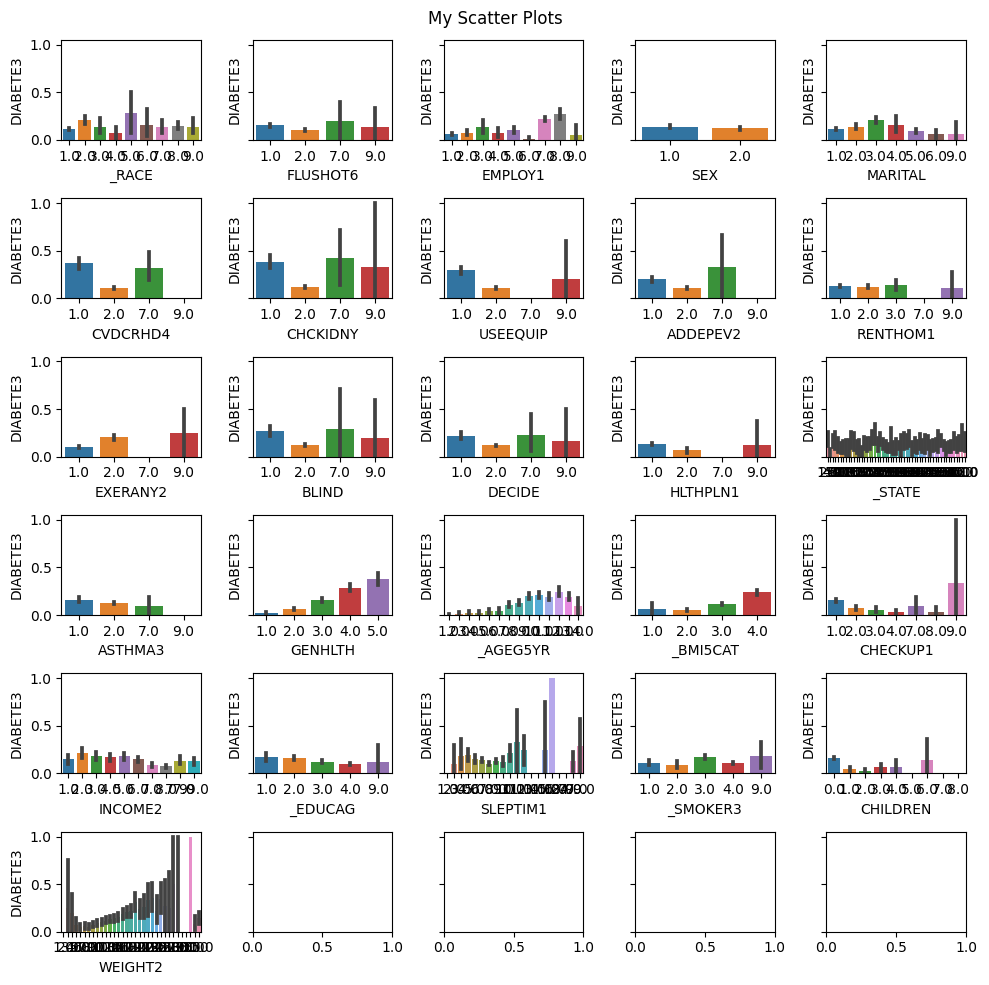

In [ ]:
# plot build
fig, ax = plt.subplots(6, 5, figsize=(10,10), sharey=True)

for i,col in enumerate(df.columns[2:-1]):
  if i <= 4:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[0,i])
  elif i > 4 and i <=9:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[1,i-5])
  elif i > 9 and i <=14:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[2,i-10])
  elif i > 14 and i <=19:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[3,i-15])
  elif i > 19 and i <=24:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[4,i-20])
  else:
    sns.barplot(x=df[col], y=df["DIABETE3"], ax=ax[5,i-25])

#ax[1,6].axis('off')                  # HIDES AXES ON LAST ROW AND COL

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

In [ ]:
# Save the complete DataFrame to a new CSV file for easy access henceforth
df.to_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv", index=False)

#### **Let's set up the Logistic Regression!**

In [ ]:
# Import tools into Colab
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the "complete_diabetes_data.csv" to a working DataFrame and verify it
df = pd.read_csv("drive/My Drive/Diabetes Risk Factors/LRM_model_data.csv")

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

df.drop("PERSONID", axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('DIABETE3', axis=1), df['DIABETE3'], test_size=0.2, random_state=42)

# Define the parameter grid for the logistic regression model
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy score
best_params = grid_search.best_params_
best_acc = grid_search.best_score_

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", best_params)
print("Best accuracy score:", best_acc)

# Plot the confusion matrix
cm = confusion_matrix(y_test, grid_search.predict(X_test))
print(cm)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best accuracy score: 0.8781366011209271
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Fit model with best parameters

In [ ]:
best_model = LogisticRegression(C= 10, penalty='l2')
best_model.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print('Recall:', recall)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8610804851157663
Recall: 0.8610804851157663
Confusion Matrix:
[[763  22]
 [104  18]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Which features play most strongly into diabetes?

In [ ]:
# features
features_dict = dict(zip(X_train.columns, list(best_model.coef_[0])))
features_dict

{'_RACE': 0.05375907516669117,
 'FLUSHOT6': -0.0043670817281044345,
 'EMPLOY1': 0.03775587698946592,
 'SEX': -0.349754399723058,
 'MARITAL': 0.00030000514187183795,
 'CVDCRHD4': -0.4226490403745349,
 'CHCKIDNY': -0.26809135448823707,
 'USEEQUIP': -0.2271835890177115,
 'ADDEPEV2': -0.5198894756509375,
 'RENTHOM1': -0.09375950522461604,
 'EXERANY2': -0.06129270324346257,
 'BLIND': -0.4356339478950831,
 'DECIDE': -0.08033765458478032,
 'HLTHPLN1': -0.4488780658054785,
 '_STATE': -0.005348134120522003,
 'ASTHMA3': -0.3506977718396372,
 'GENHLTH': 0.6074175430548513,
 '_AGEG5YR': 0.13727398483746892,
 '_BMI5CAT': 0.560044976538366,
 'CHECKUP1': -0.2542802286445705,
 'INCOME2': -0.0004850641538459797,
 '_EDUCAG': -0.08346097106143006,
 'SLEPTIM1': 0.0004692144802356516,
 '_SMOKER3': -0.022285770554152654,
 'CHILDREN': -0.20635929380351017,
 'WEIGHT2': 0.011007889209201129,
 'MENTHLTH': -0.026782651395926158}

In [ ]:
# sort and display in decending order of importance
sorted_dict = sorted(features_dict.items(), key=lambda x: abs(x[1]))

sorted_dict.reverse()
sorted_dict

[('GENHLTH', 0.6074175430548513),
 ('_BMI5CAT', 0.560044976538366),
 ('ADDEPEV2', -0.5198894756509375),
 ('HLTHPLN1', -0.4488780658054785),
 ('BLIND', -0.4356339478950831),
 ('CVDCRHD4', -0.4226490403745349),
 ('ASTHMA3', -0.3506977718396372),
 ('SEX', -0.349754399723058),
 ('CHCKIDNY', -0.26809135448823707),
 ('CHECKUP1', -0.2542802286445705),
 ('USEEQUIP', -0.2271835890177115),
 ('CHILDREN', -0.20635929380351017),
 ('_AGEG5YR', 0.13727398483746892),
 ('RENTHOM1', -0.09375950522461604),
 ('_EDUCAG', -0.08346097106143006),
 ('DECIDE', -0.08033765458478032),
 ('EXERANY2', -0.06129270324346257),
 ('_RACE', 0.05375907516669117),
 ('EMPLOY1', 0.03775587698946592),
 ('MENTHLTH', -0.026782651395926158),
 ('_SMOKER3', -0.022285770554152654),
 ('WEIGHT2', 0.011007889209201129),
 ('_STATE', -0.005348134120522003),
 ('FLUSHOT6', -0.0043670817281044345),
 ('INCOME2', -0.0004850641538459797),
 ('SLEPTIM1', 0.0004692144802356516),
 ('MARITAL', 0.00030000514187183795)]

In [ ]:
# print the top 10 most consequential features of our dataset
print("According to our analysis:")
print("")
for i in range(10):
  print(f"The {sorted_dict[i][0]} variable was the number {i+1} most important feature with a coefficient value of {sorted_dict[i][1]}.")

According to our analysis:

The GENHLTH variable was the number 1 most important feature with a coefficient value of 0.6074175430548513.
The _BMI5CAT variable was the number 2 most important feature with a coefficient value of 0.560044976538366.
The ADDEPEV2 variable was the number 3 most important feature with a coefficient value of -0.5198894756509375.
The HLTHPLN1 variable was the number 4 most important feature with a coefficient value of -0.4488780658054785.
The BLIND variable was the number 5 most important feature with a coefficient value of -0.4356339478950831.
The CVDCRHD4 variable was the number 6 most important feature with a coefficient value of -0.4226490403745349.
The ASTHMA3 variable was the number 7 most important feature with a coefficient value of -0.3506977718396372.
The SEX variable was the number 8 most important feature with a coefficient value of -0.349754399723058.
The CHCKIDNY variable was the number 9 most important feature with a coefficient value of -0.26809

At last!  We have figured our which of our features are the most important to determining whether or not a person is diabetic.  Thankfully, the somewhat obvious variables were confirmed to be the most impactful.  Normally, we would save the model, but as this book is for demonstration purposes we will stop here.  

Thank you for following along!